In [1]:
try:
    from tools.utils import EnvironmentDirOptions
except:
    !wget --no-cache -O utils.py -q https://raw.githubusercontent.com/aclicona/Utils/main/MachineLearning/utils.py
    from utils import EnvironmentDirOptions

In [2]:
github_repo_path = "https://github.com/MoisesGuerreroUdeA/Monografia/archive/refs/heads/main-licona.zip"
repo_name = "Monografia"
env_token_key = "GITHUB_TOKEN"
env_dir_options = EnvironmentDirOptions()
env_dir_options.get_repo_from_git(github_repo_path, repo_name, env_token_key)
main_dir = env_dir_options.main_dir

In [3]:
import os
import pandas as pd
from keras import backend
import json

os.environ['LOG_LEVEL'] = 'INFO'
from tools.model_generation.generator import Generator
from tools.model_generation.trainer import Trainer
from tools.model_generation.evaluator import ModelEvaluator
from tools.utils import DataSelectionForEvaluator, load_scaler, save_scaler

In [4]:
dataset = pd.read_feather(os.path.join(main_dir, 'data', 'dataset.feather'))

In [5]:
json_config_path = os.path.join(main_dir, "config/config_models_RNN2.json")
file = open(json_config_path, 'r')
model_configurations = json.load(file)

model_generator = Generator()
trainer = Trainer()
model_save_dir = env_dir_options.save_dir_path("models/")

In [6]:
for model_conf in model_configurations:
    backend.clear_session()
    model = model_generator.generate_model(model_conf)
    training_params, scaler_x, scaler_y = trainer.train_model_params(model_conf, dataset, model_save_dir)
    history = model.fit(**training_params)
    trainer.save_history(model.name, history.history, model_save_dir)
    save_scaler(scaler_x, f'{model_save_dir}/{model.name}_scaler_x.pkl')
    save_scaler(scaler_y, f'{model_save_dir}/{model.name}_scaler_y.pkl')

2024-06-06 11:17:08,923 WARNING From c:\Users\Moisés Guerrero\.virtualenvs\Monografia-OKFRz4jC\Lib\site-packages\keras\src\backend\common\global_state.py:82: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

2024-06-06 11:17:09,141 INFO Adding a Input layer to the model with name None
2024-06-06 11:17:09,143 INFO Configuring input shape = (48, 11)
2024-06-06 11:17:09,148 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:17:09,321 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:17:09,337 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:17:09,379 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:17:09,392 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:17:09,473 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:17:09,489 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:17:09,544 INF

Model: "RNN_2_look48_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 48, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 11:17:09,657 INFO Starting training for all available models...
2024-06-06 11:17:09,657 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 11:17:09,657 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 11:17:09,751 WARNING Output column should by the first column on dataset!
2024-06-06 11:17:09,758 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 11:17:10,579 INFO 
-----------------------------
X Train shape: (110348, 48, 11) 
y Train shape: (110348, 48) 
X Test shape: (47238, 48, 11) 
y Test shape: (47238, 48) 
-----------------------------

2024-06-06 11:17:10,596 INFO Model with name RNN_2_look48_overlap1 will be saved on directory ./models/...


Epoch 1/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 369s 104ms/step - loss: 0.0348 - mae: 0.1733 - mse: 0.0708 - val_loss: 0.0108 - val_mae: 0.1024 - val_mse: 0.0216
Epoch 2/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 310s 90ms/step - loss: 0.0058 - mae: 0.0724 - mse: 0.0116 - val_loss: 0.0102 - val_mae: 0.0964 - val_mse: 0.0204
Epoch 3/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 302s 84ms/step - loss: 0.0063 - mae: 0.0763 - mse: 0.0126 - val_loss: 0.0112 - val_mae: 0.1035 - val_mse: 0.0224
Epoch 4/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 290s 84ms/step - loss: 0.0057 - mae: 0.0713 - mse: 0.0114 - val_loss: 0.0115 - val_mae: 0.1066 - val_mse: 0.0231
Epoch 5/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 347s 101ms/step - loss: 0.0057 - mae: 0.0713 - mse: 0.0115 - val_loss: 0.0118 - val_mae: 0.1094 - val_mse: 0.0235
Epoch 6/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 367s 96ms/step - loss: 0.0057 - mae: 0.0711 - mse: 0.0115 - val_loss: 0.0115 - val_mae: 0.1050 - val_mse: 0.0229


2024-06-06 11:50:17,028 INFO Saving model RNN_2_look48_overlap1 history on directory ./models/
2024-06-06 11:50:17,028 INFO History file was successfully wrote for model RNN_2_look48_overlap1!
2024-06-06 11:50:17,346 INFO Adding a Input layer to the model with name None
2024-06-06 11:50:17,362 INFO Configuring input shape = (72, 11)
2024-06-06 11:50:17,362 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:50:17,477 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:50:17,486 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:50:17,528 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:50:17,545 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:50:17,609 INFO Adding a Dropout layer to the model with name None
2024-06-06 11:50:17,625 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 11:50:17,679 INFO Adding a Dropout layer to the model with name None
2024-06-06 11

Model: "RNN_2_look72_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 72, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 11:50:17,809 INFO Starting training for all available models...
2024-06-06 11:50:17,809 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 11:50:17,809 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 11:50:17,888 WARNING Output column should by the first column on dataset!
2024-06-06 11:50:17,896 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 11:50:19,202 INFO 
-----------------------------
X Train shape: (110324, 72, 11) 
y Train shape: (110324, 48) 
X Test shape: (47214, 72, 11) 
y Test shape: (47214, 48) 
-----------------------------

2024-06-06 11:50:19,202 INFO Model with name RNN_2_look72_overlap1 will be saved on directory ./models/...


Epoch 1/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 439s 123ms/step - loss: 0.0351 - mae: 0.1748 - mse: 0.0711 - val_loss: 0.0114 - val_mae: 0.1065 - val_mse: 0.0229
Epoch 2/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 433s 125ms/step - loss: 0.0058 - mae: 0.0725 - mse: 0.0117 - val_loss: 0.0116 - val_mae: 0.1058 - val_mse: 0.0232
Epoch 3/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 519s 148ms/step - loss: 0.0058 - mae: 0.0722 - mse: 0.0116 - val_loss: 0.0112 - val_mae: 0.1019 - val_mse: 0.0225
Epoch 4/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 528s 153ms/step - loss: 0.0057 - mae: 0.0709 - mse: 0.0114 - val_loss: 0.0108 - val_mae: 0.1013 - val_mse: 0.0217
Epoch 5/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 528s 153ms/step - loss: 0.0057 - mae: 0.0711 - mse: 0.0114 - val_loss: 0.0110 - val_mae: 0.0997 - val_mse: 0.0220
Epoch 6/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 536s 155ms/step - loss: 0.0058 - mae: 0.0718 - mse: 0.0115 - val_loss: 0.0113 - val_mae: 0.1074 - val_mse: 0.0225
Epoch 7/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 520s 151ms/step - loss

2024-06-06 12:58:03,574 INFO Saving model RNN_2_look72_overlap1 history on directory ./models/
2024-06-06 12:58:03,577 INFO History file was successfully wrote for model RNN_2_look72_overlap1!
2024-06-06 12:58:04,748 INFO Adding a Input layer to the model with name None
2024-06-06 12:58:04,752 INFO Configuring input shape = (96, 11)
2024-06-06 12:58:04,757 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 12:58:04,934 INFO Adding a Dropout layer to the model with name None
2024-06-06 12:58:04,946 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 12:58:04,983 INFO Adding a Dropout layer to the model with name None
2024-06-06 12:58:04,997 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 12:58:05,080 INFO Adding a Dropout layer to the model with name None
2024-06-06 12:58:05,103 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 12:58:05,150 INFO Adding a Dropout layer to the model with name None
2024-06-06 12

Model: "RNN_2_look96_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 96, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 96, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 12:58:05,251 INFO Starting training for all available models...
2024-06-06 12:58:05,252 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 12:58:05,253 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 12:58:05,396 WARNING Output column should by the first column on dataset!
2024-06-06 12:58:05,400 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 12:58:06,462 INFO 
-----------------------------
X Train shape: (110300, 96, 11) 
y Train shape: (110300, 48) 
X Test shape: (47190, 96, 11) 
y Test shape: (47190, 48) 
-----------------------------

2024-06-06 12:58:06,466 INFO Model with name RNN_2_look96_overlap1 will be saved on directory ./models/...


Epoch 1/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 673s 192ms/step - loss: 0.0354 - mae: 0.1754 - mse: 0.0719 - val_loss: 0.0114 - val_mae: 0.1080 - val_mse: 0.0228
Epoch 2/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 620s 180ms/step - loss: 0.0061 - mae: 0.0751 - mse: 0.0122 - val_loss: 0.0129 - val_mae: 0.1080 - val_mse: 0.0259
Epoch 3/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 587s 170ms/step - loss: 0.0060 - mae: 0.0737 - mse: 0.0121 - val_loss: 0.0126 - val_mae: 0.1075 - val_mse: 0.0251
Epoch 4/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 673s 195ms/step - loss: 0.0059 - mae: 0.0726 - mse: 0.0118 - val_loss: 0.0123 - val_mae: 0.1072 - val_mse: 0.0245
Epoch 5/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 668s 191ms/step - loss: 0.0059 - mae: 0.0725 - mse: 0.0118 - val_loss: 0.0134 - val_mae: 0.1154 - val_mse: 0.0267


2024-06-06 13:51:49,997 INFO Saving model RNN_2_look96_overlap1 history on directory ./models/
2024-06-06 13:51:49,999 INFO History file was successfully wrote for model RNN_2_look96_overlap1!
2024-06-06 13:51:50,450 INFO Adding a Input layer to the model with name None
2024-06-06 13:51:50,451 INFO Configuring input shape = (48, 11)
2024-06-06 13:51:50,453 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:51:50,551 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:51:50,559 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:51:50,599 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:51:50,613 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:51:50,684 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:51:50,698 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:51:50,749 INFO Adding a Dropout layer to the model with name None
2024-06-06 13

Model: "RNN_2_look48_overlap24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 48, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 13:51:50,897 INFO Starting training for all available models...
2024-06-06 13:51:50,899 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 13:51:50,902 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 13:51:50,999 WARNING Output column should by the first column on dataset!
2024-06-06 13:51:51,003 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 13:51:51,073 INFO 
-----------------------------
X Train shape: (4598, 48, 11) 
y Train shape: (4598, 48) 
X Test shape: (1969, 48, 11) 
y Test shape: (1969, 48) 
-----------------------------

2024-06-06 13:51:51,082 INFO Model with name RNN_2_look48_overlap24 will be saved on directory ./models/...


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - loss: 0.1721 - mae: 0.4712 - mse: 0.3575 - val_loss: 0.0362 - val_mae: 0.2057 - val_mse: 0.0725
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.0584 - mae: 0.2702 - mse: 0.1169 - val_loss: 0.0229 - val_mae: 0.1580 - val_mse: 0.0457
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 0.0268 - mae: 0.1829 - mse: 0.0536 - val_loss: 0.0207 - val_mae: 0.1497 - val_mse: 0.0413
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 0.0200 - mae: 0.1571 - mse: 0.0399 - val_loss: 0.0232 - val_mae: 0.1690 - val_mse: 0.0463
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - loss: 0.0177 - mae: 0.1467 - mse: 0.0354 - val_loss: 0.0240 - val_mae: 0.1579 - val_mse: 0.0480
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 0.0145 - mae: 0.1324 - mse: 0.0289 - val_loss: 0.0284 - val_mae: 0.1706 - val_mse: 0.0568
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - loss: 0.0136 - mae: 0.128

2024-06-06 13:54:15,379 INFO Saving model RNN_2_look48_overlap24 history on directory ./models/
2024-06-06 13:54:15,381 INFO History file was successfully wrote for model RNN_2_look48_overlap24!
2024-06-06 13:54:15,851 INFO Adding a Input layer to the model with name None
2024-06-06 13:54:15,852 INFO Configuring input shape = (72, 11)
2024-06-06 13:54:15,856 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:54:15,949 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:54:15,960 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:54:15,997 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:54:16,010 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:54:16,078 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:54:16,092 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:54:16,129 INFO Adding a Dropout layer to the model with name None
2024-06-06 

Model: "RNN_2_look72_overlap36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 72, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 13:54:16,246 INFO Starting training for all available models...
2024-06-06 13:54:16,247 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 13:54:16,249 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 13:54:16,331 WARNING Output column should by the first column on dataset!
2024-06-06 13:54:16,343 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 13:54:16,430 INFO 
-----------------------------
X Train shape: (3065, 72, 11) 
y Train shape: (3065, 48) 
X Test shape: (1312, 72, 11) 
y Test shape: (1312, 48) 
-----------------------------

2024-06-06 13:54:16,434 INFO Model with name RNN_2_look72_overlap36 will be saved on directory ./models/...


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - loss: 0.1925 - mae: 0.5029 - mse: 0.4018 - val_loss: 0.0366 - val_mae: 0.2098 - val_mse: 0.0732
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - loss: 0.1076 - mae: 0.3710 - mse: 0.2169 - val_loss: 0.0354 - val_mae: 0.2082 - val_mse: 0.0708
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - loss: 0.0622 - mae: 0.2806 - mse: 0.1245 - val_loss: 0.0290 - val_mae: 0.1835 - val_mse: 0.0580
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - loss: 0.0361 - mae: 0.2125 - mse: 0.0721 - val_loss: 0.0340 - val_mae: 0.1947 - val_mse: 0.0681
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - loss: 0.0275 - mae: 0.1846 - mse: 0.0549 - val_loss: 0.0342 - val_mae: 0.2035 - val_mse: 0.0684
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - loss: 0.0222 - mae: 0.1658 - mse: 0.0444 - val_loss: 0.0311 - val_mae: 0.1843 - val_mse: 0.0622
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - loss: 0.0179 - mae: 0.1491 - mse: 0.035

2024-06-06 13:59:09,262 INFO Saving model RNN_2_look72_overlap36 history on directory ./models/
2024-06-06 13:59:09,266 INFO History file was successfully wrote for model RNN_2_look72_overlap36!
2024-06-06 13:59:09,658 INFO Adding a Input layer to the model with name None
2024-06-06 13:59:09,659 INFO Configuring input shape = (96, 11)
2024-06-06 13:59:09,661 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:59:09,729 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:59:09,740 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:59:09,766 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:59:09,773 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:59:09,824 INFO Adding a Dropout layer to the model with name None
2024-06-06 13:59:09,835 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 13:59:09,861 INFO Adding a Dropout layer to the model with name None
2024-06-06 

Model: "RNN_2_look96_overlap48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 96, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 96, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 13:59:09,926 INFO Starting training for all available models...
2024-06-06 13:59:09,927 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 13:59:09,928 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 13:59:09,979 WARNING Output column should by the first column on dataset!
2024-06-06 13:59:09,985 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 13:59:10,025 INFO 
-----------------------------
X Train shape: (2298, 96, 11) 
y Train shape: (2298, 48) 
X Test shape: (984, 96, 11) 
y Test shape: (984, 48) 
-----------------------------

2024-06-06 13:59:10,031 INFO Model with name RNN_2_look96_overlap48 will be saved on directory ./models/...


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - loss: 0.1947 - mae: 0.5046 - mse: 0.4078 - val_loss: 0.0328 - val_mae: 0.1944 - val_mse: 0.0656
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - loss: 0.1194 - mae: 0.3914 - mse: 0.2416 - val_loss: 0.0489 - val_mae: 0.2360 - val_mse: 0.0982
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 0.0761 - mae: 0.3098 - mse: 0.1527 - val_loss: 0.0527 - val_mae: 0.2517 - val_mse: 0.1054
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - loss: 0.0472 - mae: 0.2430 - mse: 0.0944 - val_loss: 0.0396 - val_mae: 0.2138 - val_mse: 0.0793
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0453 - mae: 0.2352 - mse: 0.0907 - val_loss: 0.0552 - val_mae: 0.2476 - val_mse: 0.1104


2024-06-06 14:00:33,513 INFO Saving model RNN_2_look96_overlap48 history on directory ./models/
2024-06-06 14:00:33,518 INFO History file was successfully wrote for model RNN_2_look96_overlap48!
2024-06-06 14:00:33,970 INFO Adding a Input layer to the model with name None
2024-06-06 14:00:33,971 INFO Configuring input shape = (48, 11)
2024-06-06 14:00:33,972 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:00:34,055 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:00:34,062 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:00:34,094 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:00:34,105 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:00:34,155 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:00:34,167 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:00:34,192 INFO Adding a Dropout layer to the model with name None
2024-06-06 

Model: "RNN_2_look48_overlap48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 48, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 14:00:34,270 INFO Starting training for all available models...
2024-06-06 14:00:34,271 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 14:00:34,272 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 14:00:34,312 WARNING Output column should by the first column on dataset!
2024-06-06 14:00:34,320 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 14:00:34,353 INFO 
-----------------------------
X Train shape: (2299, 48, 11) 
y Train shape: (2299, 48) 
X Test shape: (985, 48, 11) 
y Test shape: (985, 48) 
-----------------------------

2024-06-06 14:00:34,357 INFO Model with name RNN_2_look48_overlap48 will be saved on directory ./models/...


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - loss: 0.2069 - mae: 0.5224 - mse: 0.4365 - val_loss: 0.0279 - val_mae: 0.1801 - val_mse: 0.0557
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.1275 - mae: 0.4050 - mse: 0.2587 - val_loss: 0.0433 - val_mae: 0.2332 - val_mse: 0.0866
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0813 - mae: 0.3214 - mse: 0.1630 - val_loss: 0.0249 - val_mae: 0.1810 - val_mse: 0.0499
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0508 - mae: 0.2529 - mse: 0.1016 - val_loss: 0.0403 - val_mae: 0.2215 - val_mse: 0.0806
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0377 - mae: 0.2167 - mse: 0.0755 - val_loss: 0.0407 - val_mae: 0.2105 - val_mse: 0.0814
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0264 - mae: 0.1793 - mse: 0.0527 - val_loss: 0.0290 - val_mae: 0.1787 - val_mse: 0.0579
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0232 - mae: 0.1683 - mse: 0.0465 - v

2024-06-06 14:01:44,606 INFO Saving model RNN_2_look48_overlap48 history on directory ./models/
2024-06-06 14:01:44,625 INFO History file was successfully wrote for model RNN_2_look48_overlap48!
2024-06-06 14:01:45,231 INFO Adding a Input layer to the model with name None
2024-06-06 14:01:45,232 INFO Configuring input shape = (72, 11)
2024-06-06 14:01:45,233 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:01:45,317 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:01:45,327 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:01:45,356 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:01:45,365 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:01:45,423 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:01:45,432 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:01:45,464 INFO Adding a Dropout layer to the model with name None
2024-06-06 

Model: "RNN_2_look72_overlap72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 72, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 14:01:45,535 INFO Starting training for all available models...
2024-06-06 14:01:45,538 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 14:01:45,539 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 14:01:45,581 WARNING Output column should by the first column on dataset!
2024-06-06 14:01:45,589 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 14:01:45,617 INFO 
-----------------------------
X Train shape: (1533, 72, 11) 
y Train shape: (1533, 48) 
X Test shape: (656, 72, 11) 
y Test shape: (656, 48) 
-----------------------------

2024-06-06 14:01:45,623 INFO Model with name RNN_2_look72_overlap72 will be saved on directory ./models/...


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - loss: 0.2213 - mae: 0.5404 - mse: 0.4713 - val_loss: 0.0257 - val_mae: 0.1719 - val_mse: 0.0514
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 0.1366 - mae: 0.4201 - mse: 0.2776 - val_loss: 0.0222 - val_mae: 0.1619 - val_mse: 0.0444
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 0.1028 - mae: 0.3624 - mse: 0.2072 - val_loss: 0.0292 - val_mae: 0.1824 - val_mse: 0.0585
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0767 - mae: 0.3121 - mse: 0.1538 - val_loss: 0.0406 - val_mae: 0.2186 - val_mse: 0.0813
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0552 - mae: 0.2648 - mse: 0.1104 - val_loss: 0.0256 - val_mae: 0.1813 - val_mse: 0.0512
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 0.0359 - mae: 0.2127 - mse: 0.0719 - val_loss: 0.0215 - val_mae: 0.1588 - val_mse: 0.0430
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0269 - mae: 0.1827 - mse: 0.0537 - va

2024-06-06 14:03:55,193 INFO Saving model RNN_2_look72_overlap72 history on directory ./models/
2024-06-06 14:03:55,196 INFO History file was successfully wrote for model RNN_2_look72_overlap72!
2024-06-06 14:03:55,686 INFO Adding a Input layer to the model with name None
2024-06-06 14:03:55,686 INFO Configuring input shape = (96, 11)
2024-06-06 14:03:55,688 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:03:55,768 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:03:55,776 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:03:55,808 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:03:55,819 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:03:55,872 INFO Adding a Dropout layer to the model with name None
2024-06-06 14:03:55,881 INFO Adding a Simple_rnn layer to the model with name None
2024-06-06 14:03:55,912 INFO Adding a Dropout layer to the model with name None
2024-06-06 

Model: "RNN_2_look96_overlap96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 96, 256)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 96, 256)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         6,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,384 (806.19 KB)

 Trainable params: 206,384 (806.19 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 14:03:55,991 INFO Starting training for all available models...
2024-06-06 14:03:55,992 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 14:03:55,993 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 14:03:56,035 WARNING Output column should by the first column on dataset!
2024-06-06 14:03:56,041 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 14:03:56,066 INFO 
-----------------------------
X Train shape: (1149, 96, 11) 
y Train shape: (1149, 48) 
X Test shape: (492, 96, 11) 
y Test shape: (492, 48) 
-----------------------------

2024-06-06 14:03:56,073 INFO Model with name RNN_2_look96_overlap96 will be saved on directory ./models/...


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.2233 - mae: 0.5440 - mse: 0.4745 - val_loss: 0.0247 - val_mae: 0.1729 - val_mse: 0.0495
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - loss: 0.1354 - mae: 0.4180 - mse: 0.2753 - val_loss: 0.0339 - val_mae: 0.2067 - val_mse: 0.0679
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - loss: 0.1132 - mae: 0.3812 - mse: 0.2285 - val_loss: 0.0377 - val_mae: 0.2117 - val_mse: 0.0755
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - loss: 0.0806 - mae: 0.3198 - mse: 0.1616 - val_loss: 0.0391 - val_mae: 0.2082 - val_mse: 0.0781
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - loss: 0.0583 - mae: 0.2707 - mse: 0.1167 - val_loss: 0.0230 - val_mae: 0.1574 - val_mse: 0.0459
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - loss: 0.0368 - mae: 0.2144 - mse: 0.0735 - val_loss: 0.0372 - val_mae: 0.1980 - val_mse: 0.0743
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - loss: 0.0336 - mae: 0.2039 - mse: 0.0672 - v

2024-06-06 14:05:47,549 INFO Saving model RNN_2_look96_overlap96 history on directory ./models/
2024-06-06 14:05:47,552 INFO History file was successfully wrote for model RNN_2_look96_overlap96!


Scaler loaded using joblib from ./models/RNN_2_look48_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look48_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


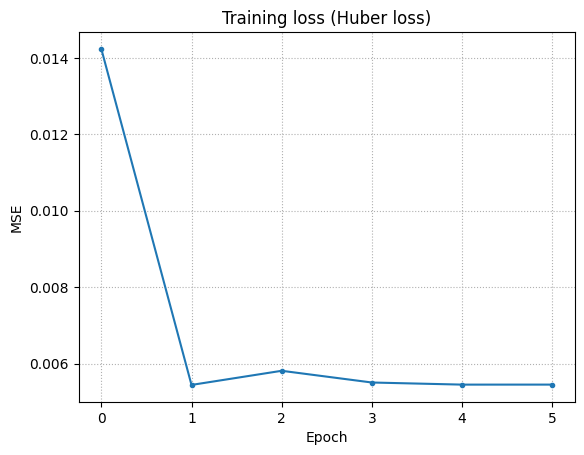

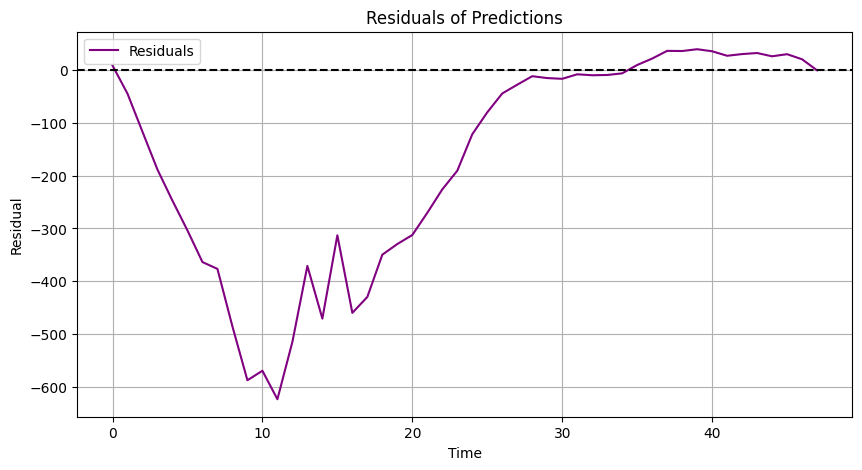

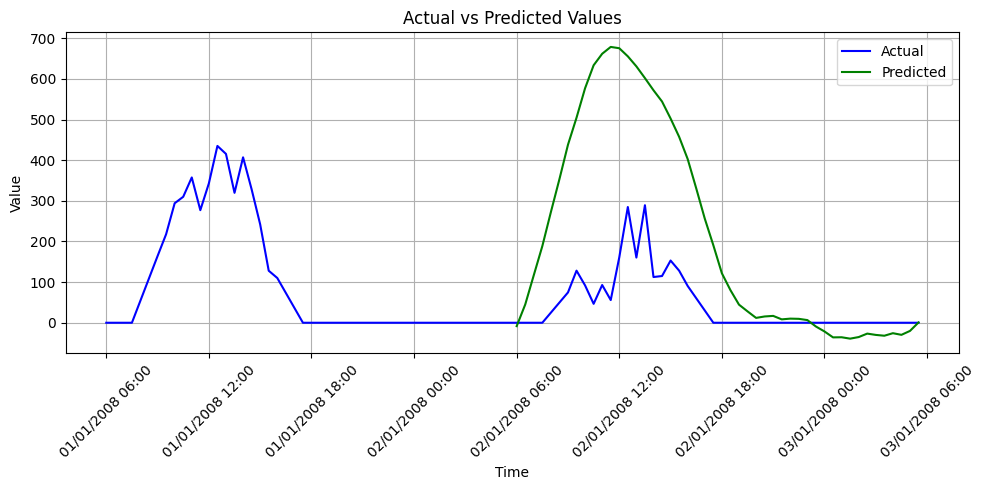

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


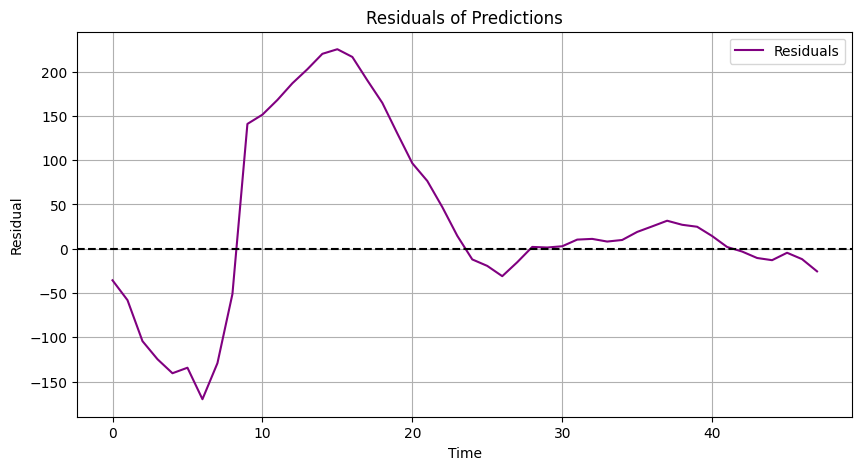

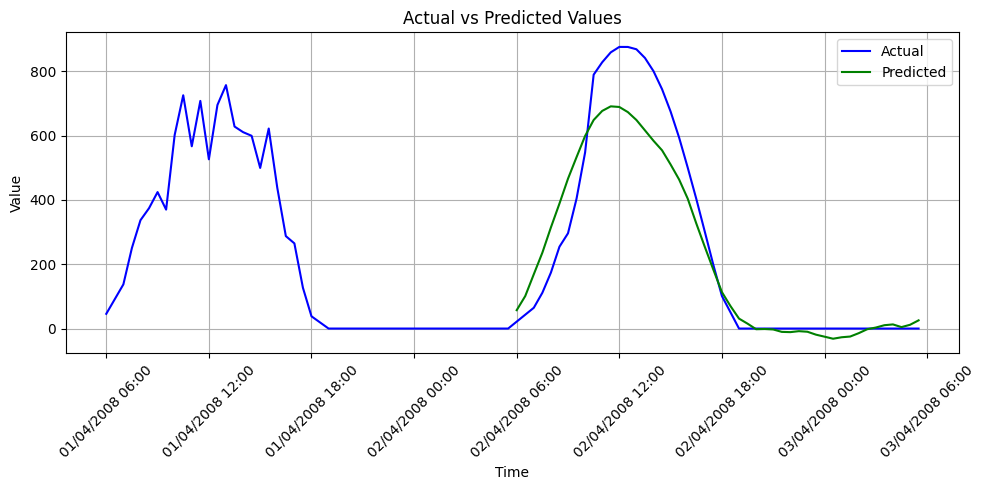

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


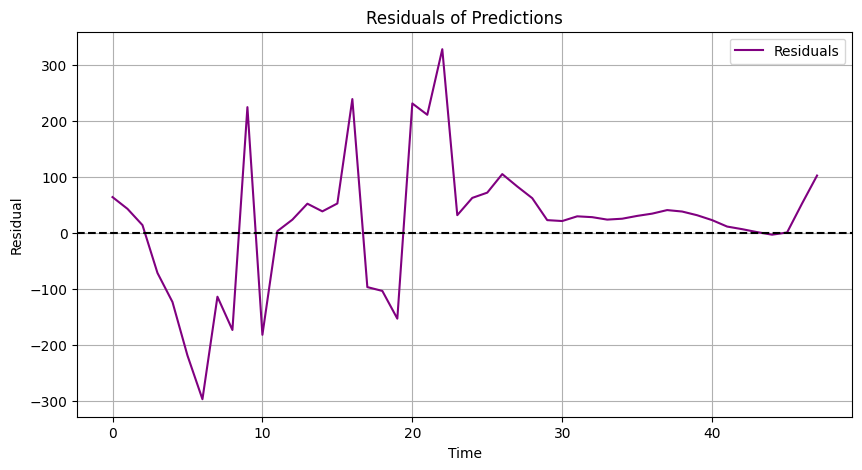

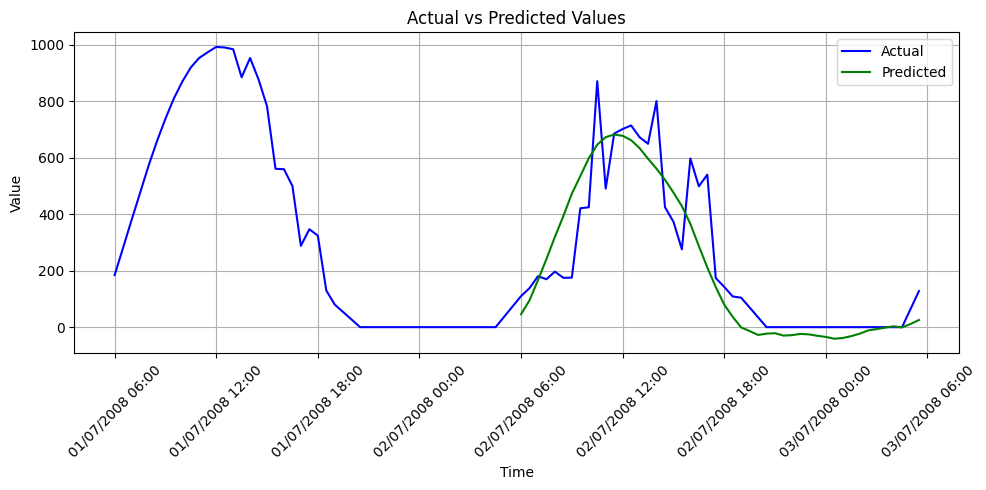

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


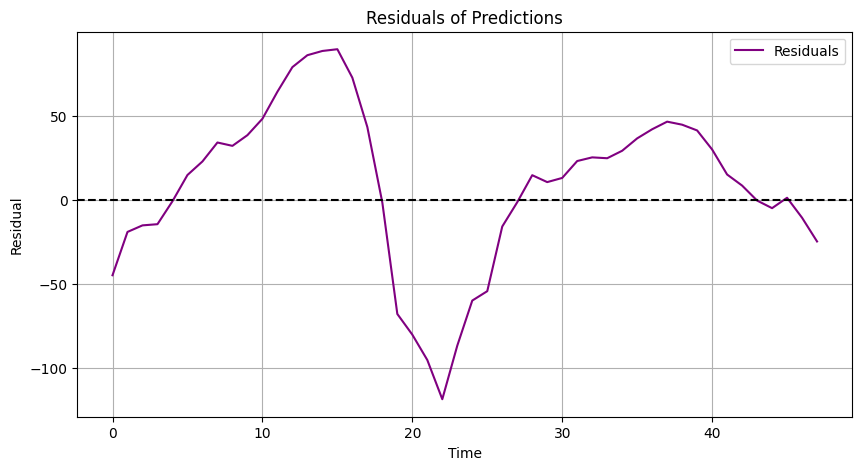

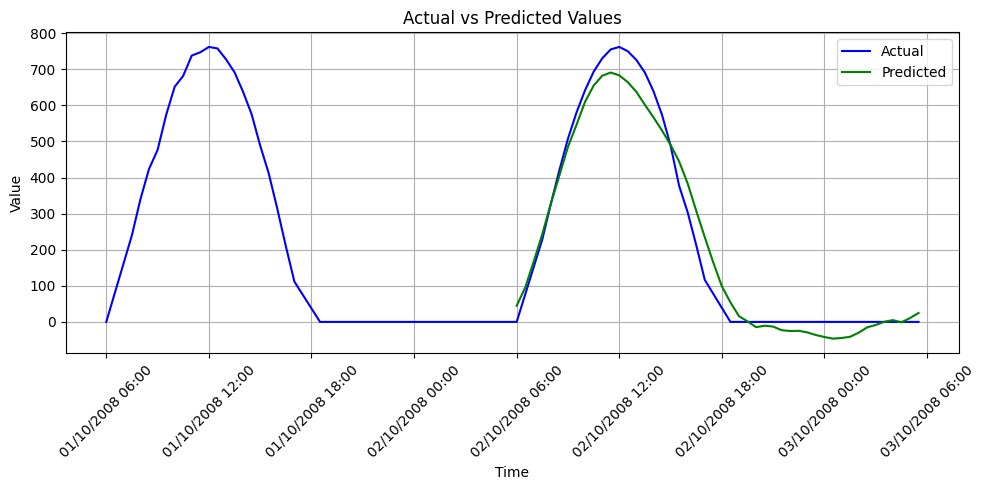

Scaler loaded using joblib from ./models/RNN_2_look72_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look72_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


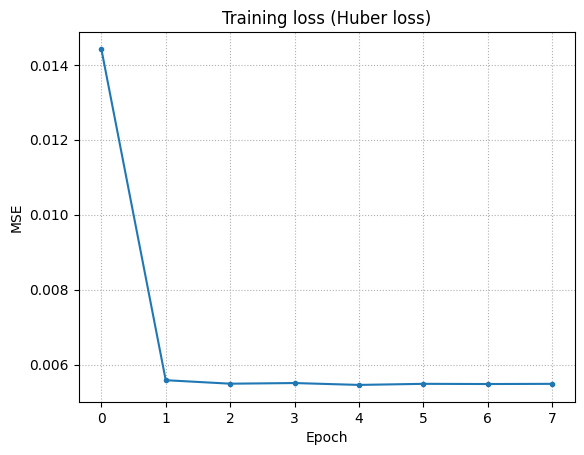

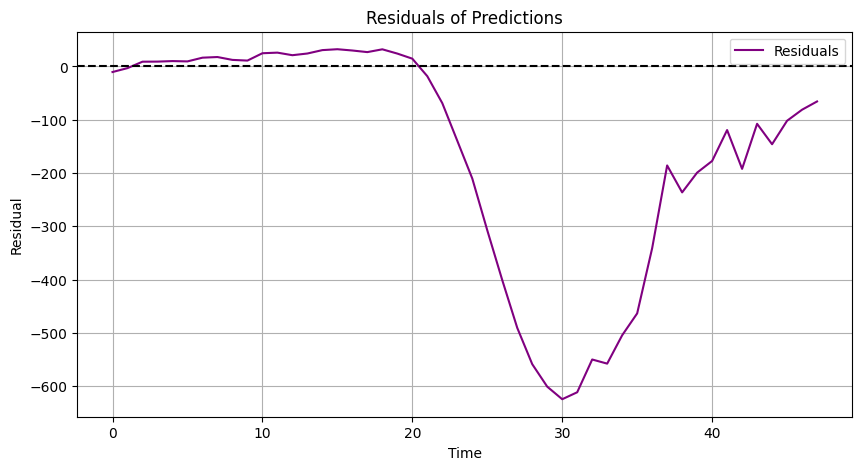

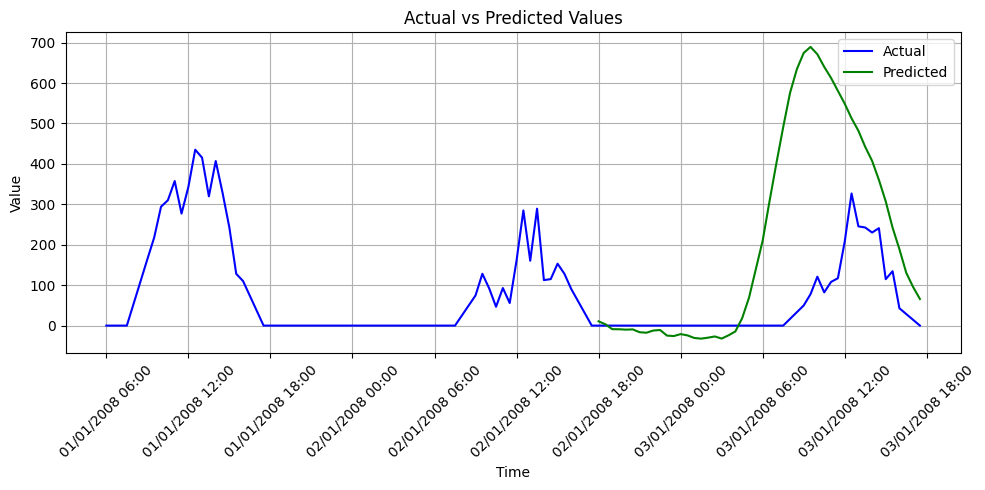

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


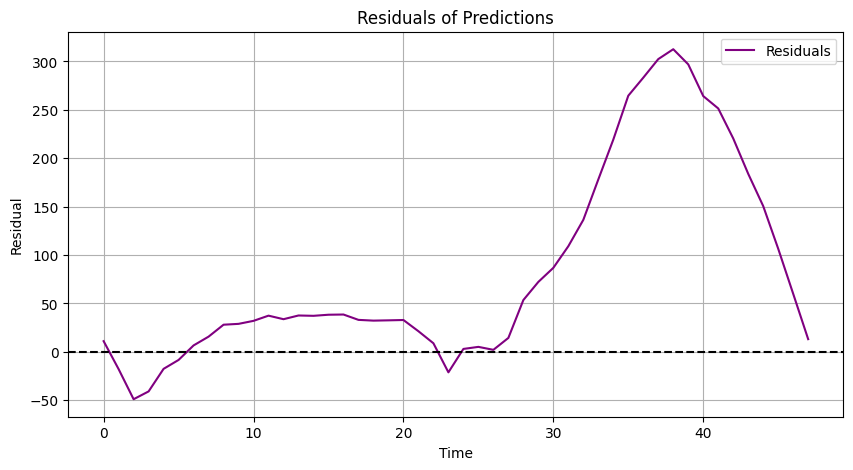

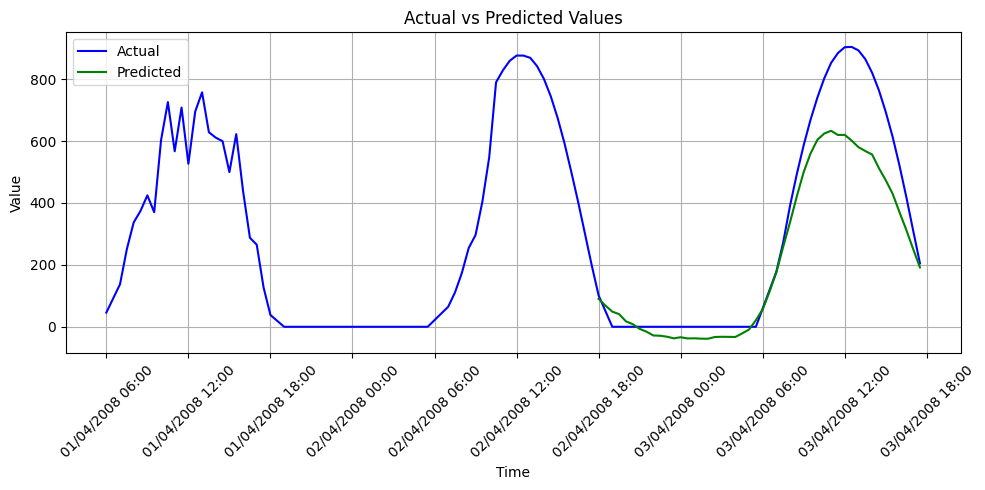

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


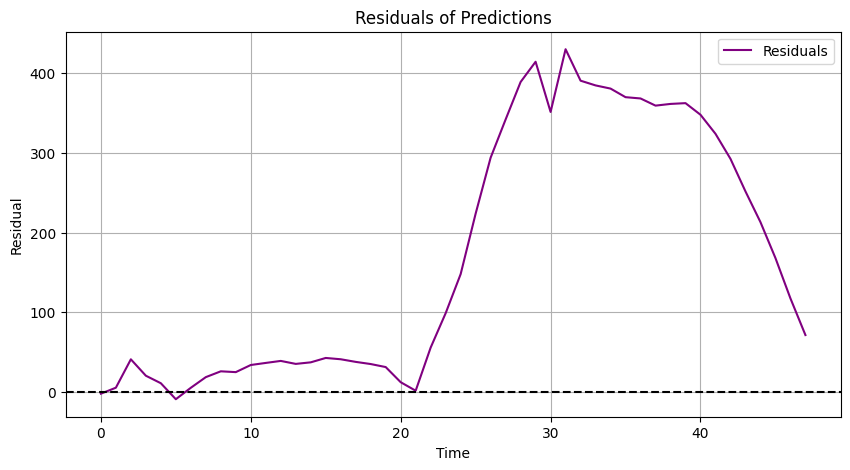

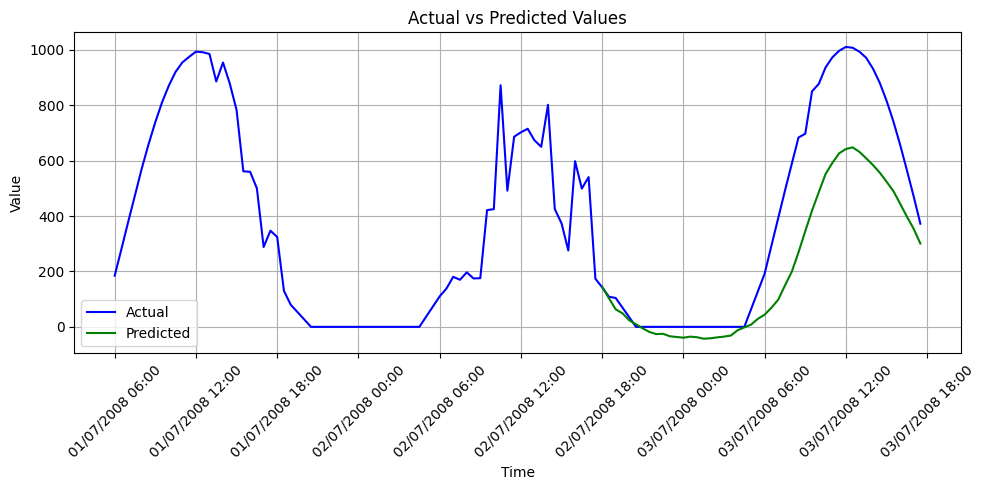

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


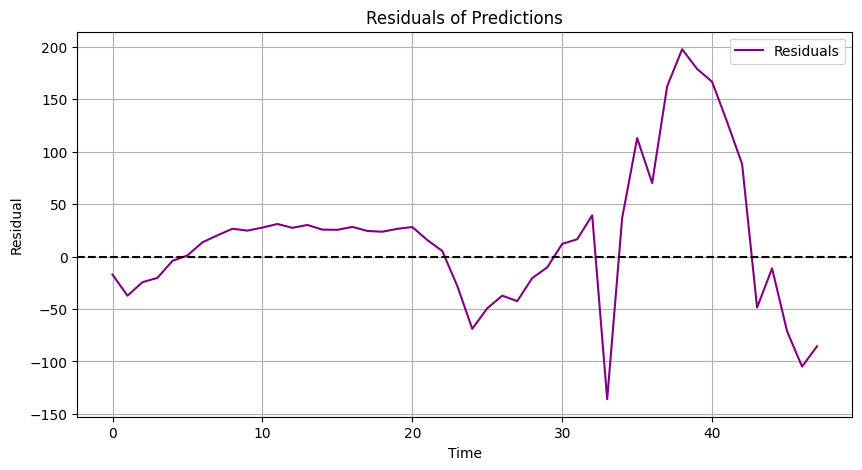

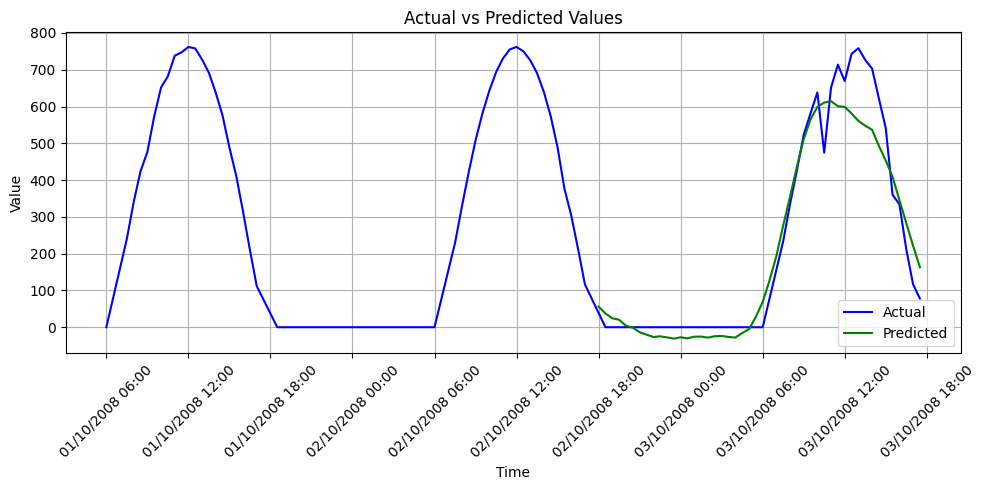

Scaler loaded using joblib from ./models/RNN_2_look96_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look96_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


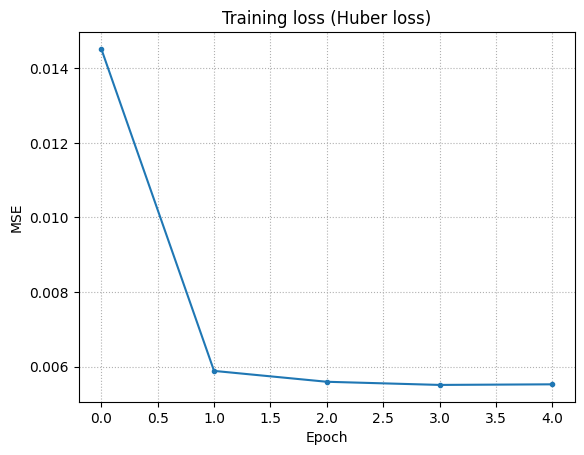

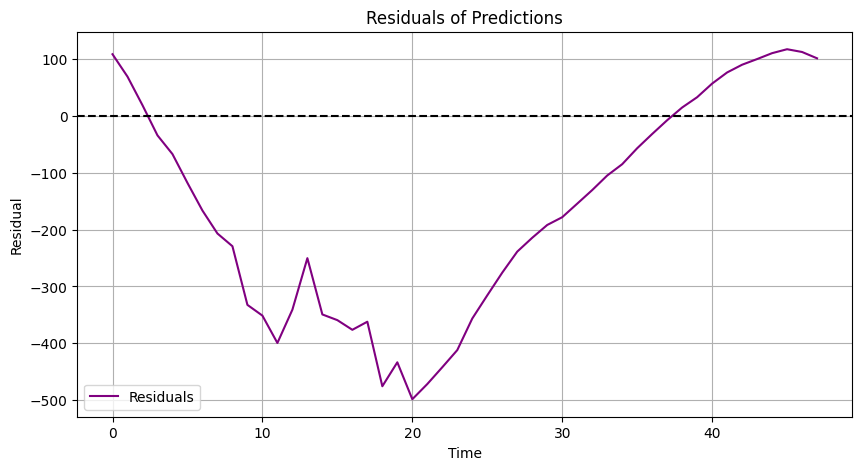

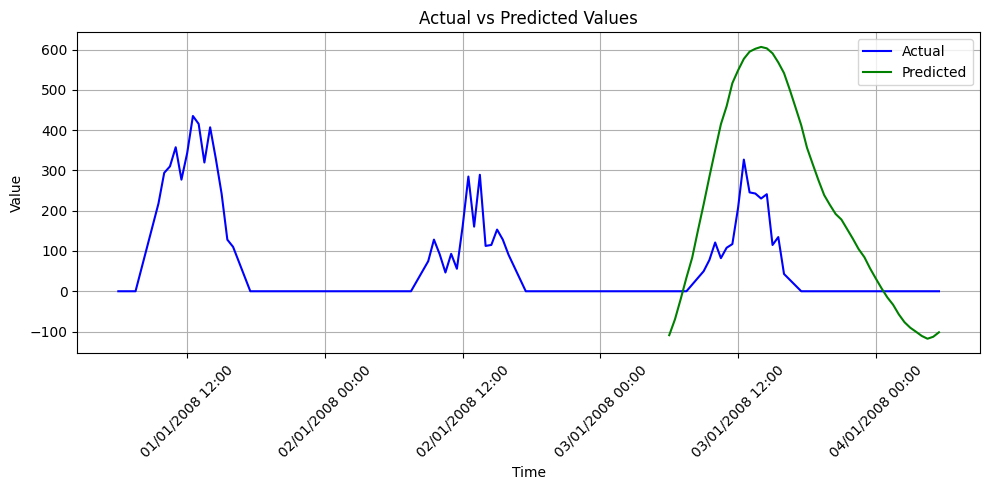

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


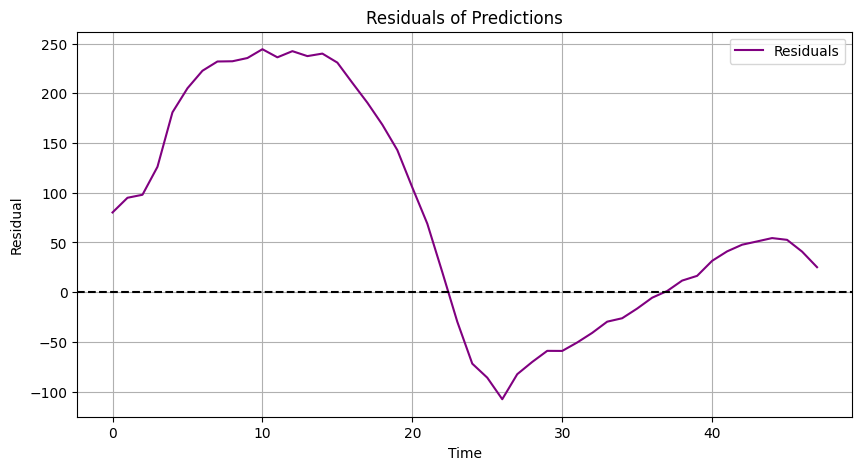

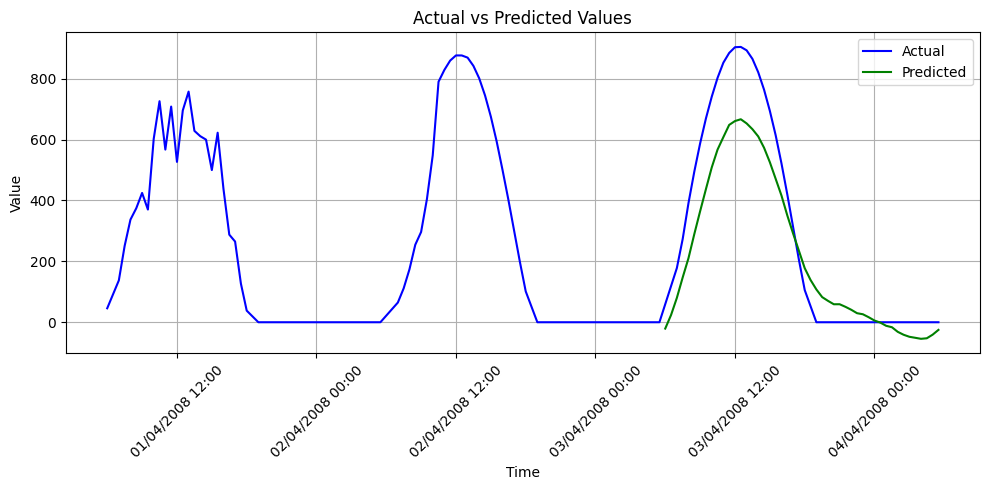

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


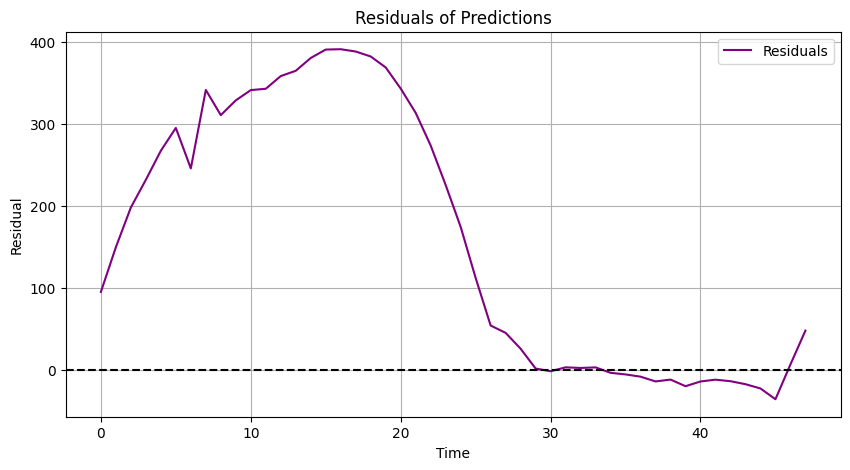

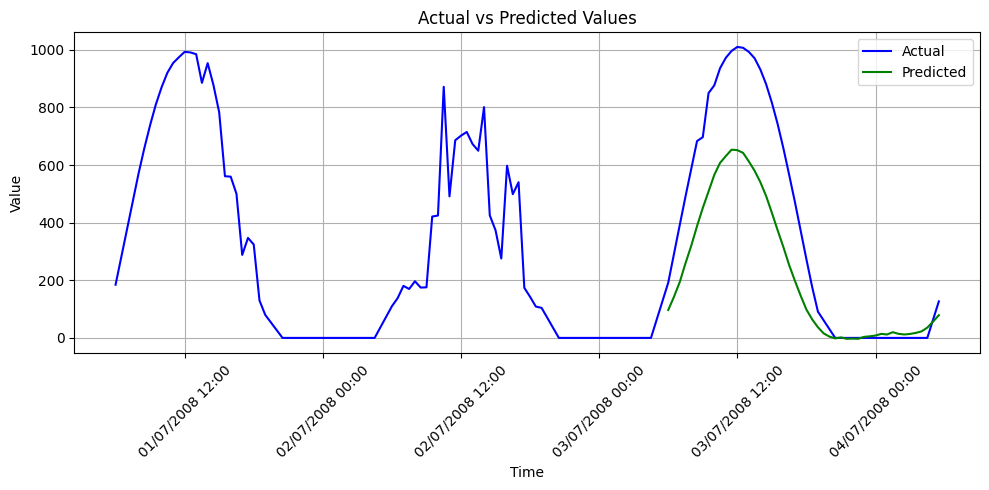

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


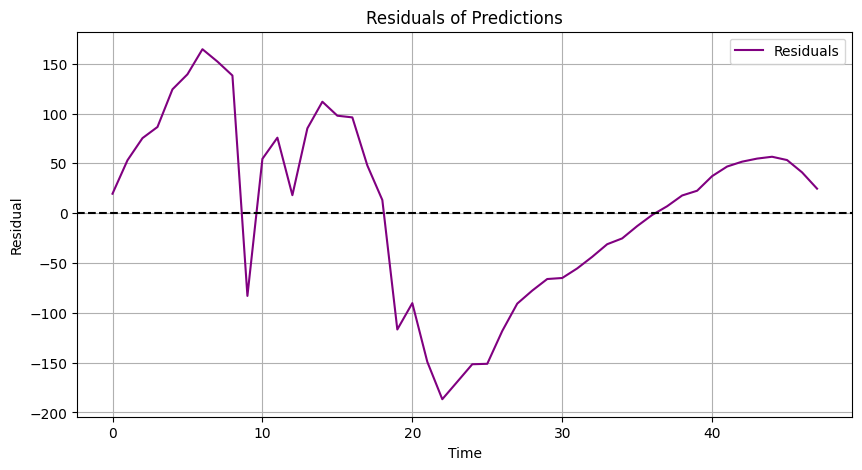

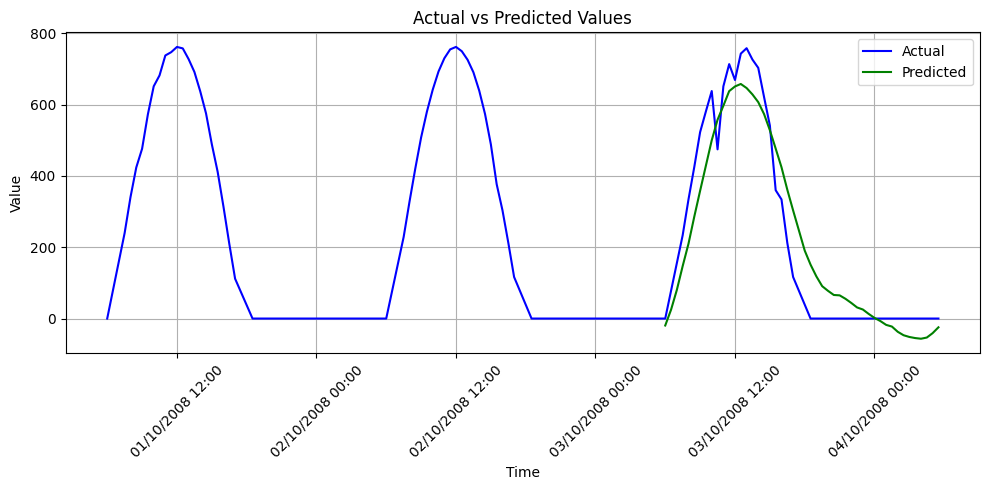

Scaler loaded using joblib from ./models/RNN_2_look48_overlap24_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look48_overlap24_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


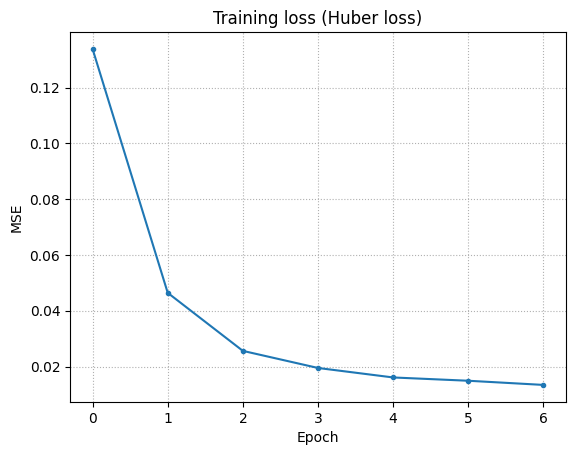

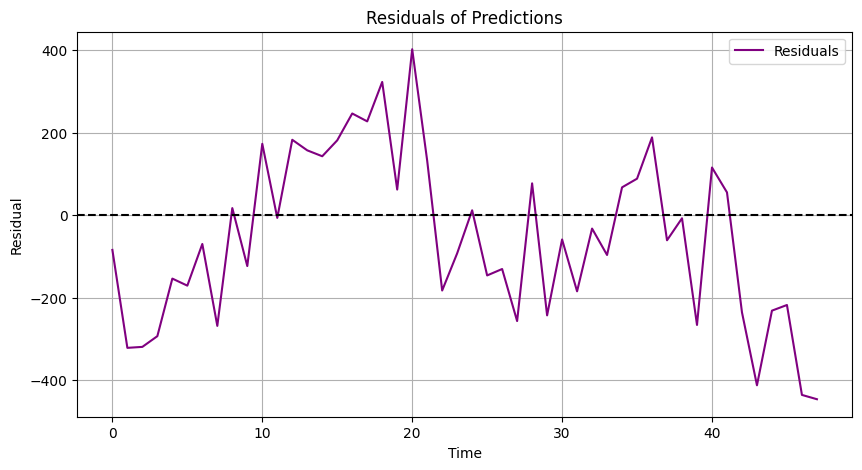

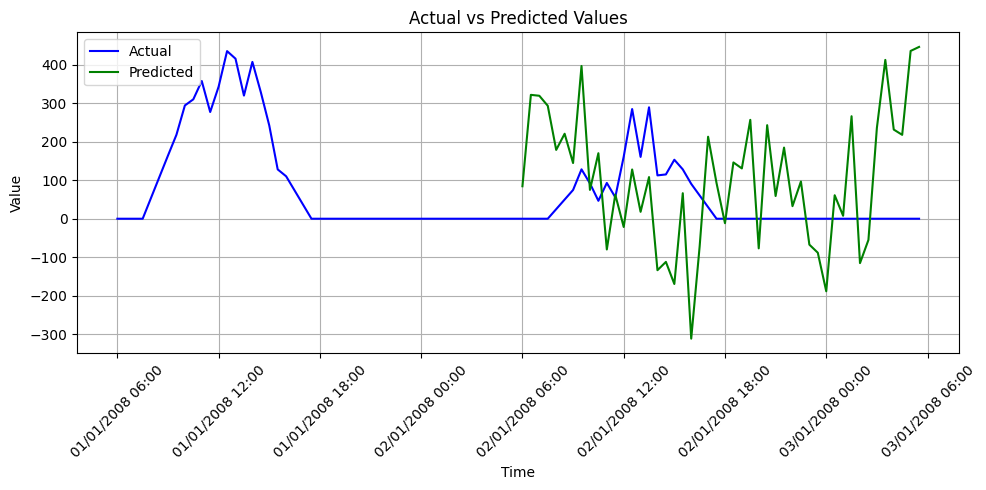

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


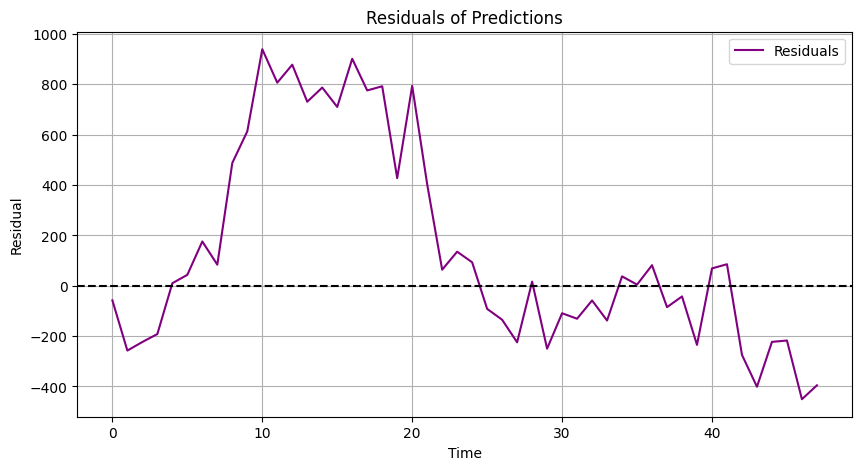

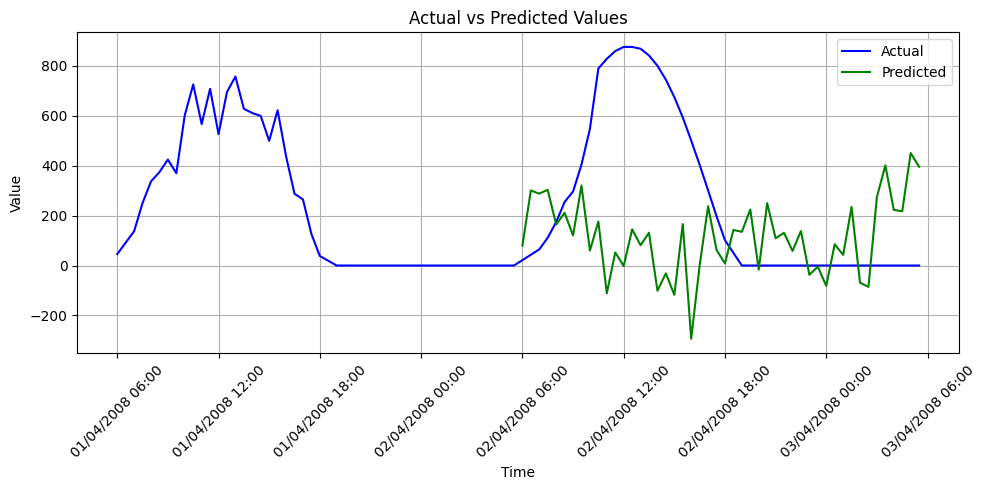

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


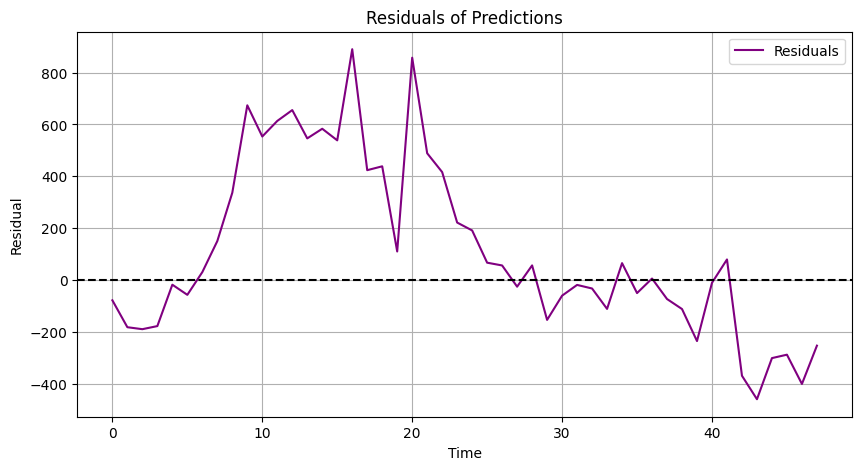

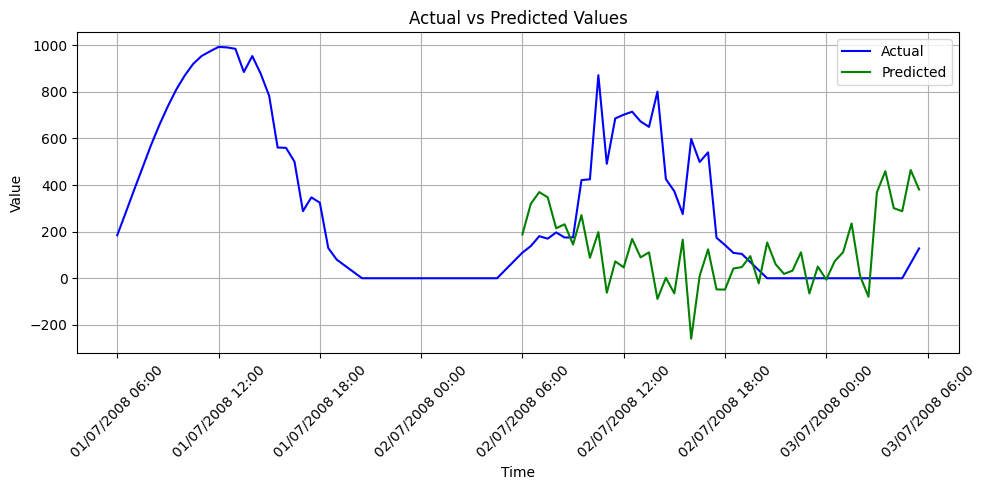

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


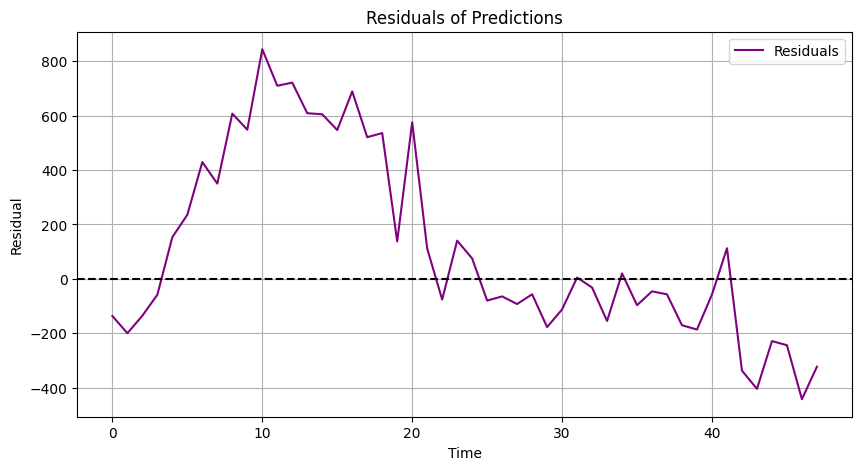

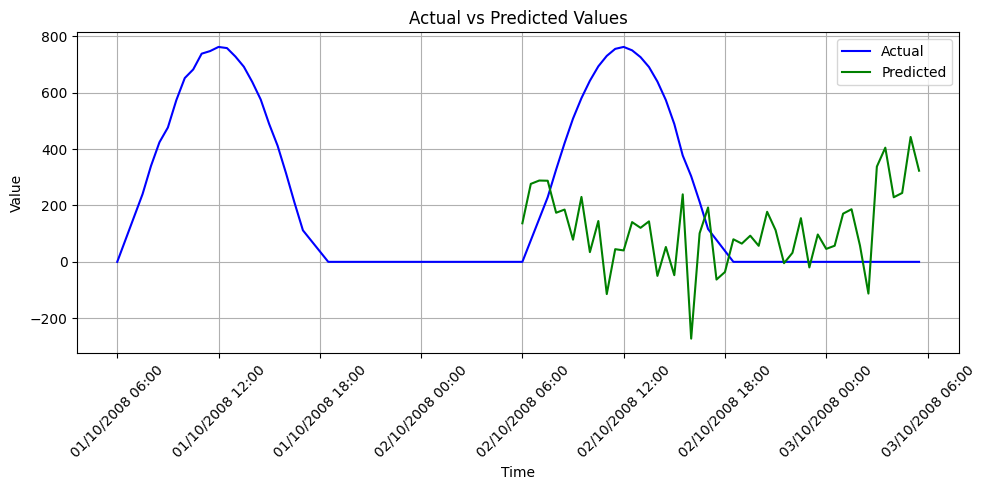

Scaler loaded using joblib from ./models/RNN_2_look72_overlap36_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look72_overlap36_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


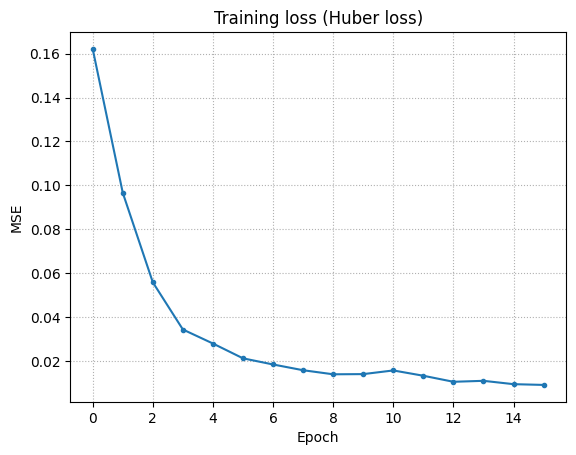

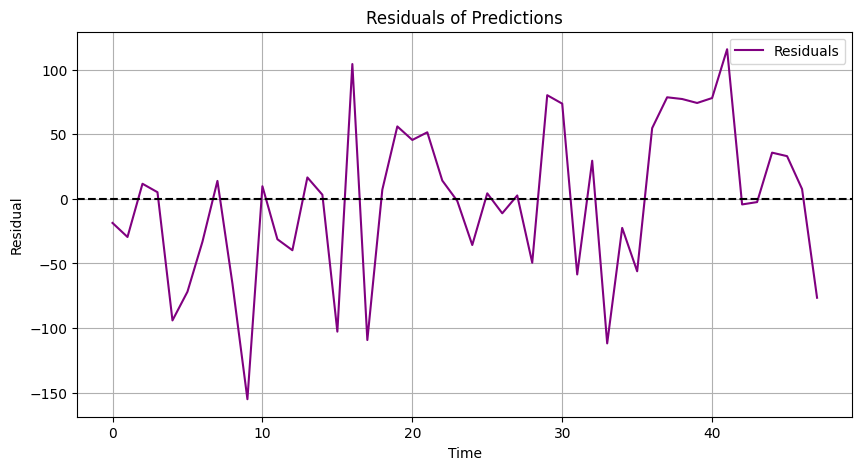

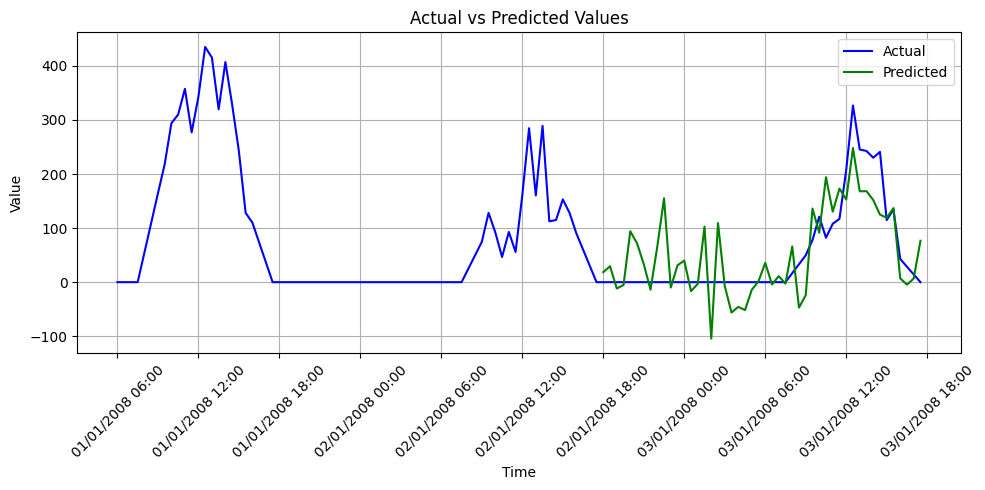

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


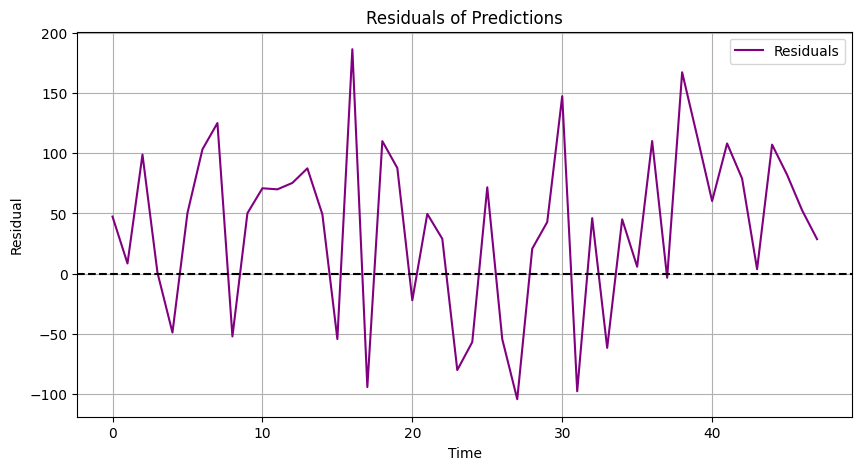

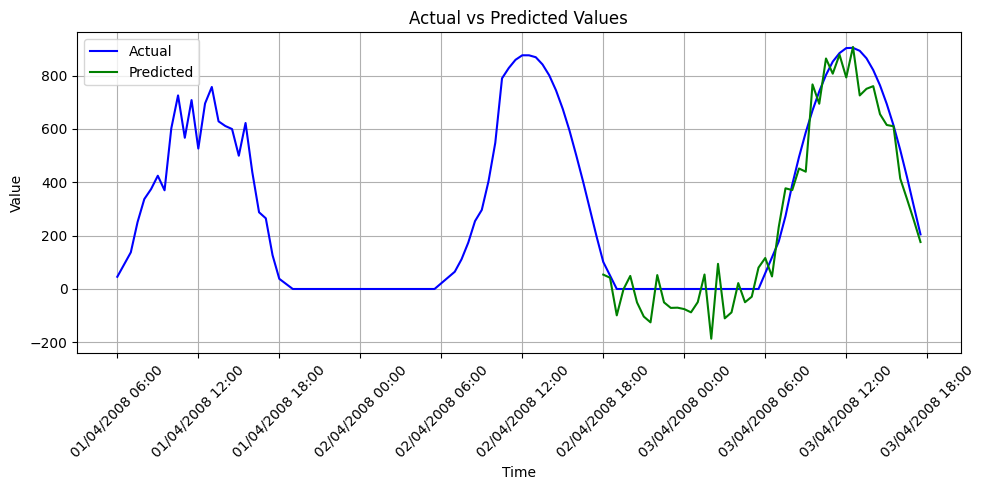

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


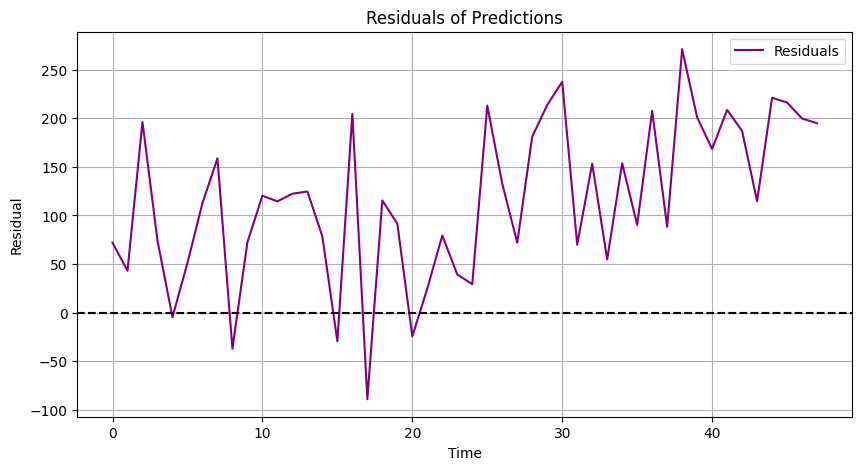

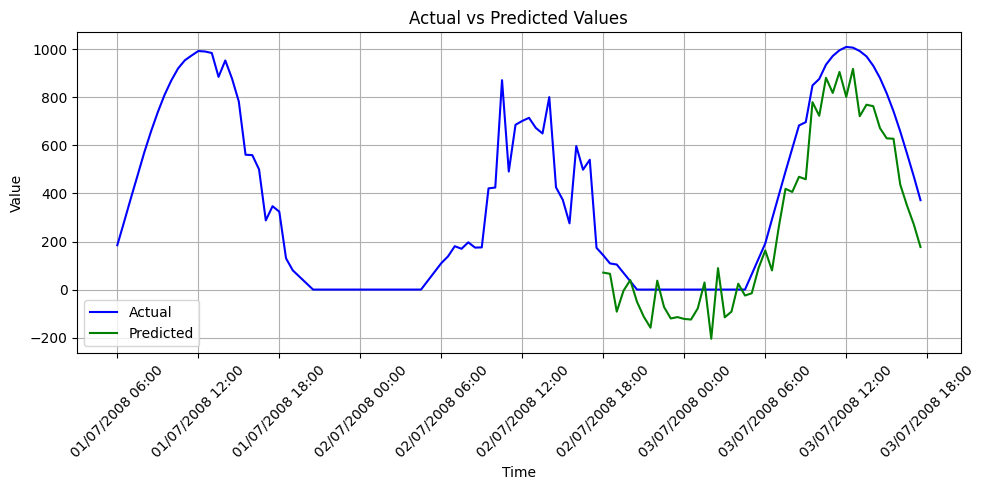

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


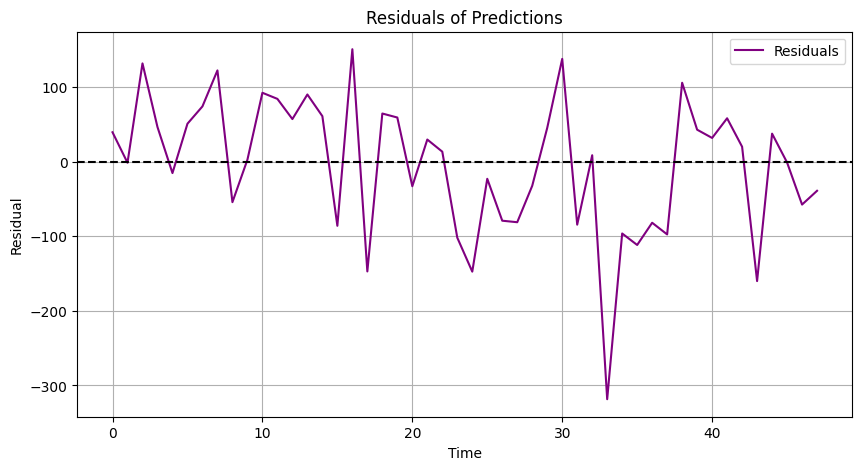

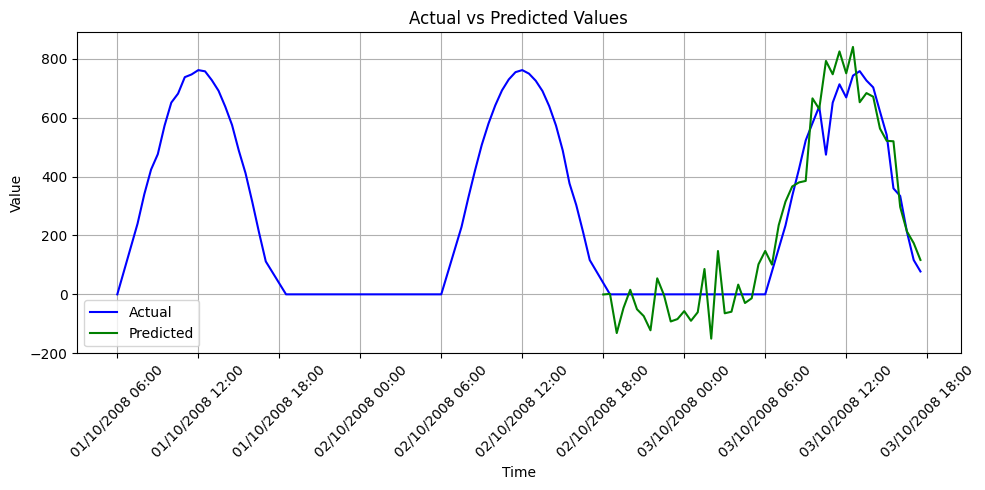

Scaler loaded using joblib from ./models/RNN_2_look96_overlap48_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look96_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


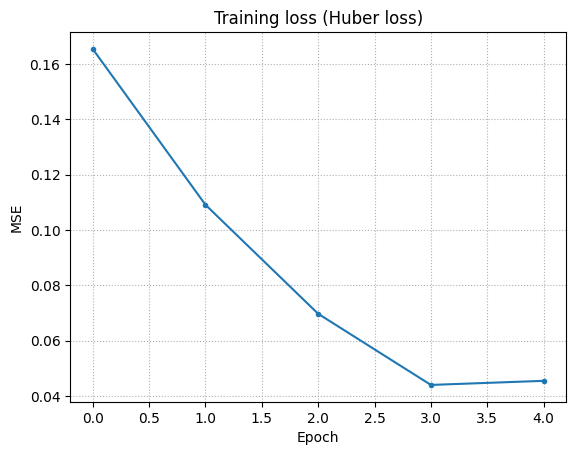

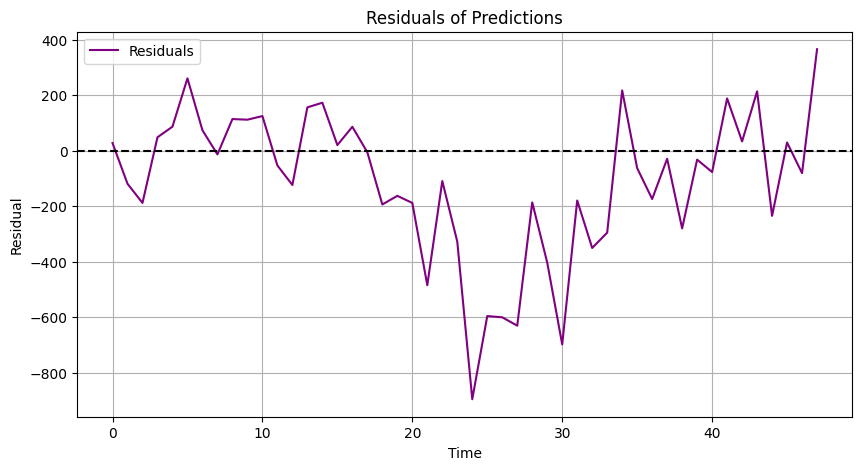

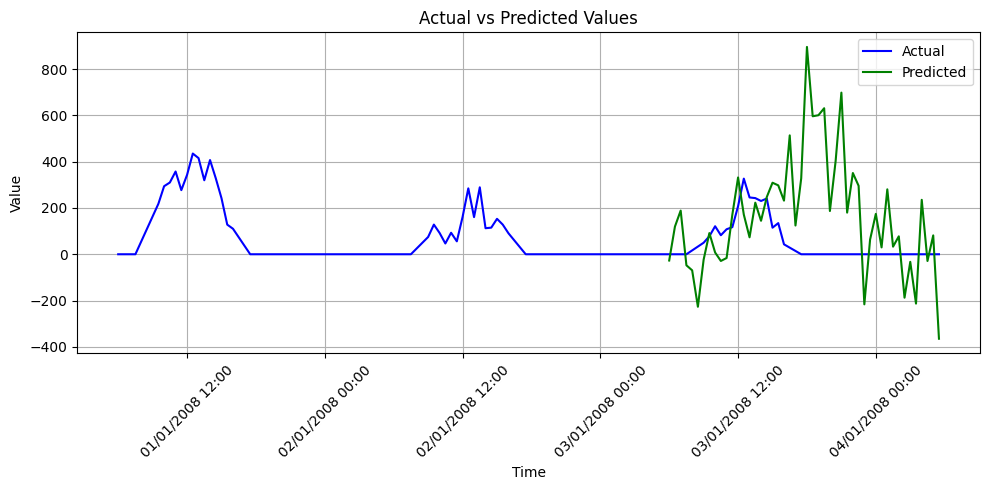

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


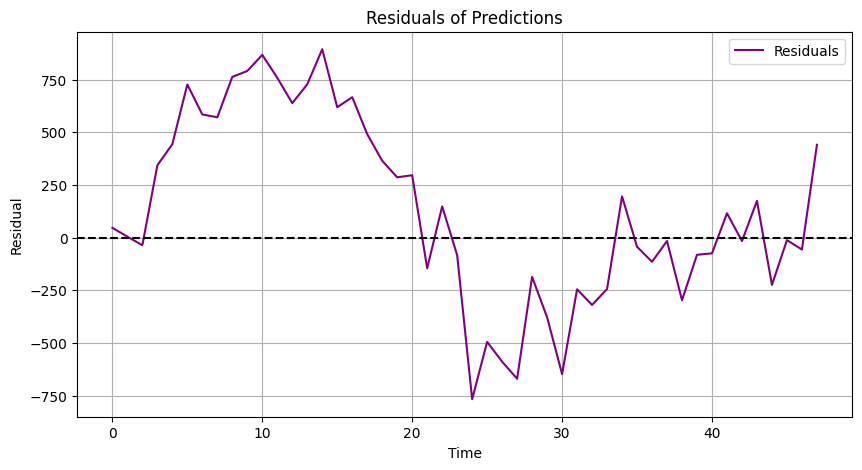

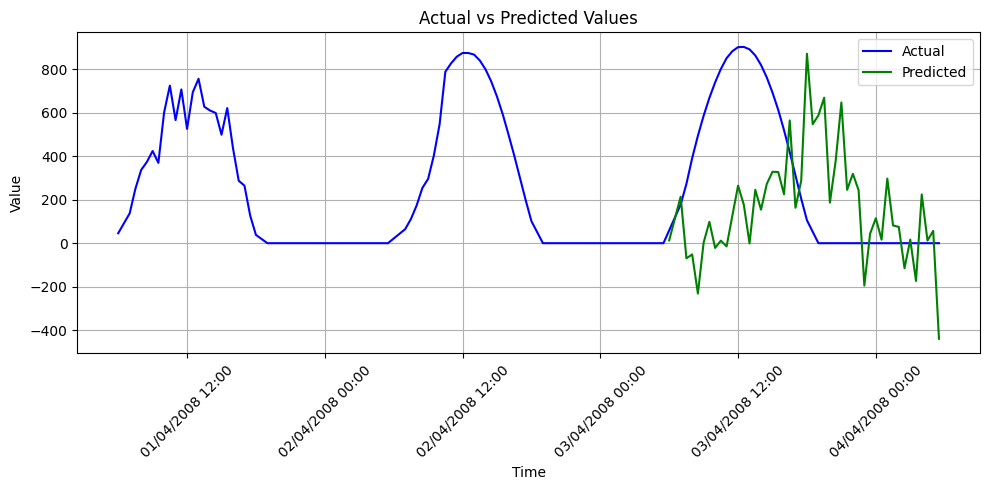

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


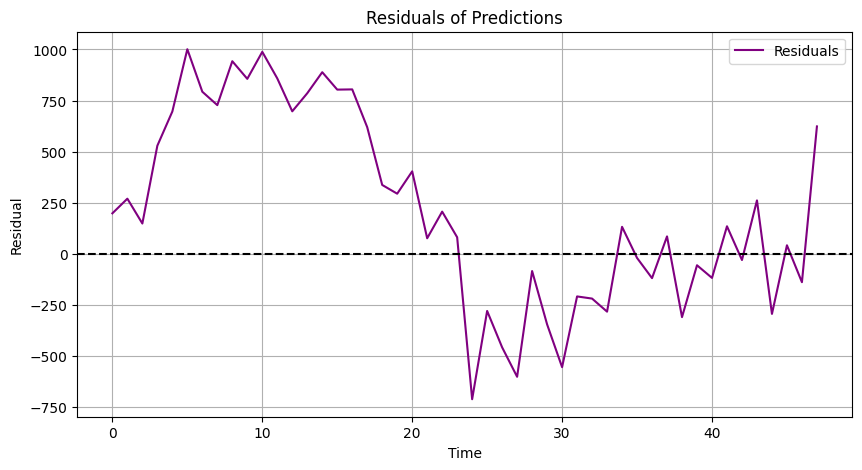

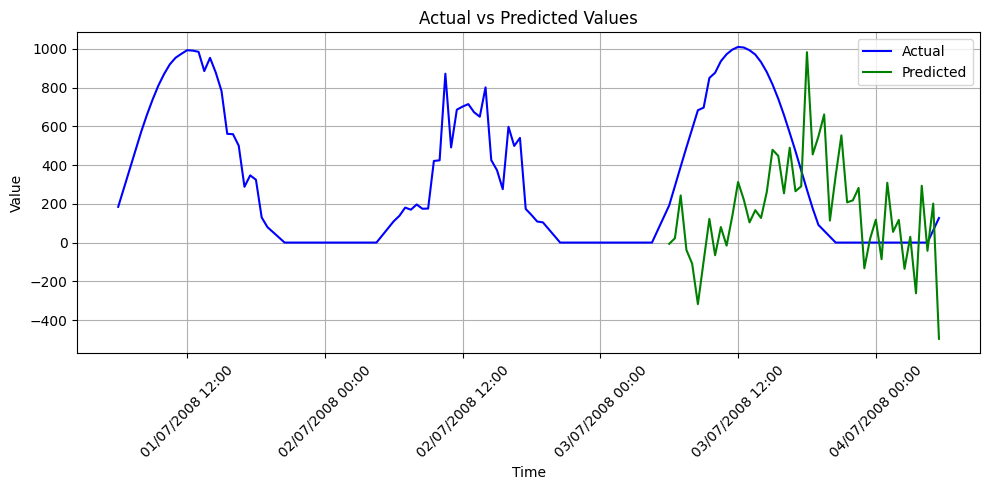

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


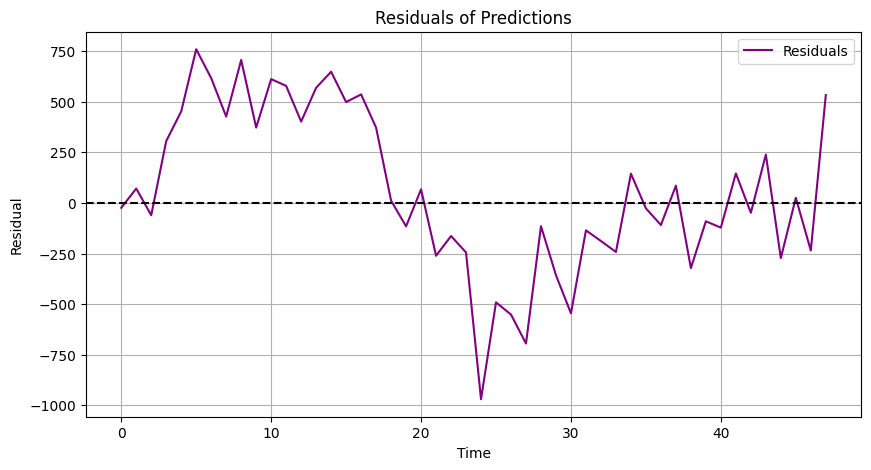

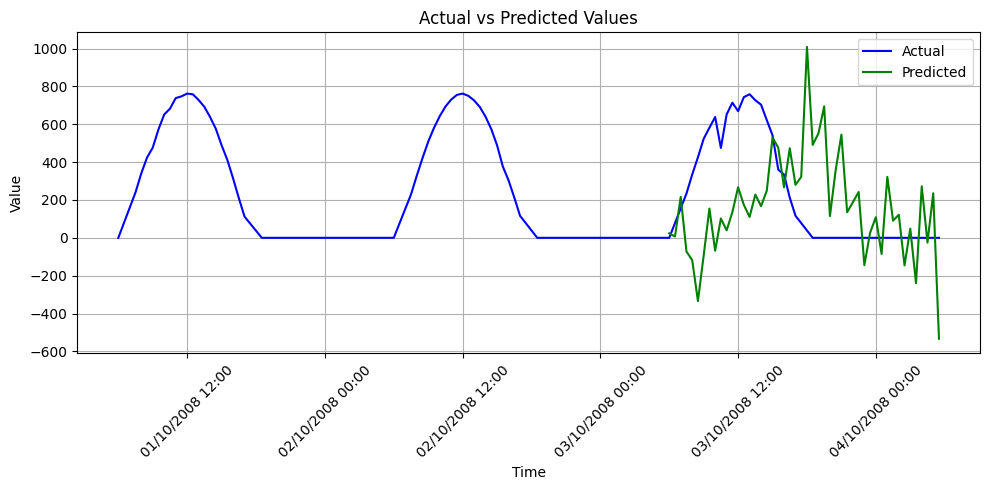

Scaler loaded using joblib from ./models/RNN_2_look48_overlap48_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look48_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


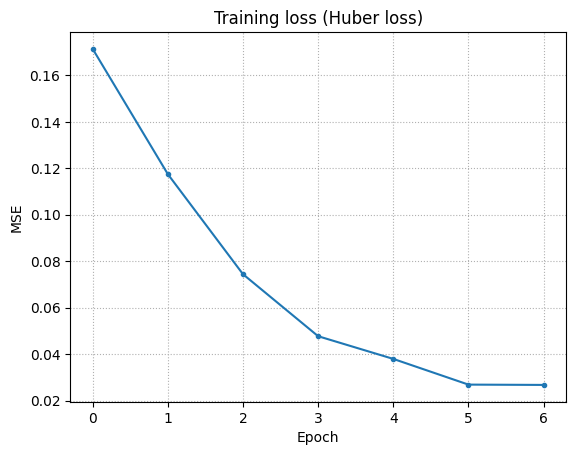

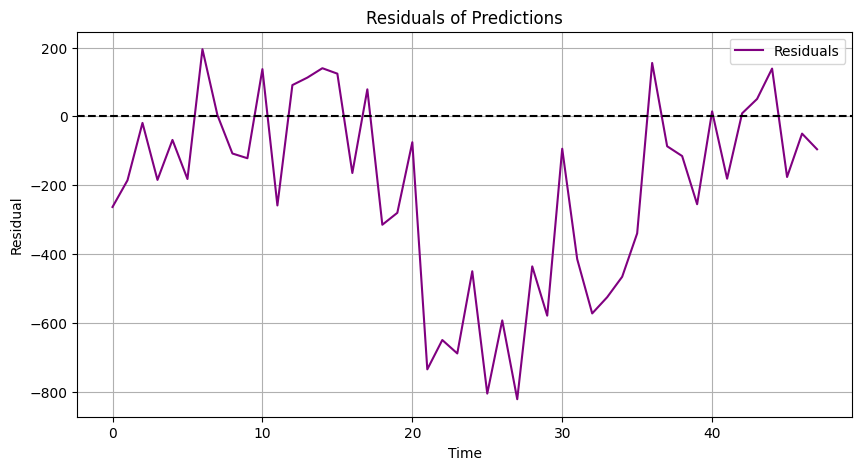

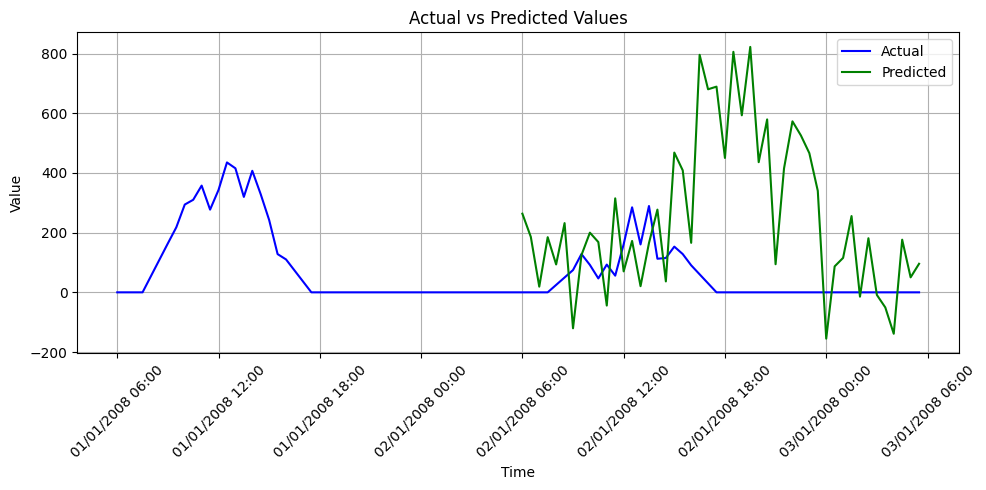

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


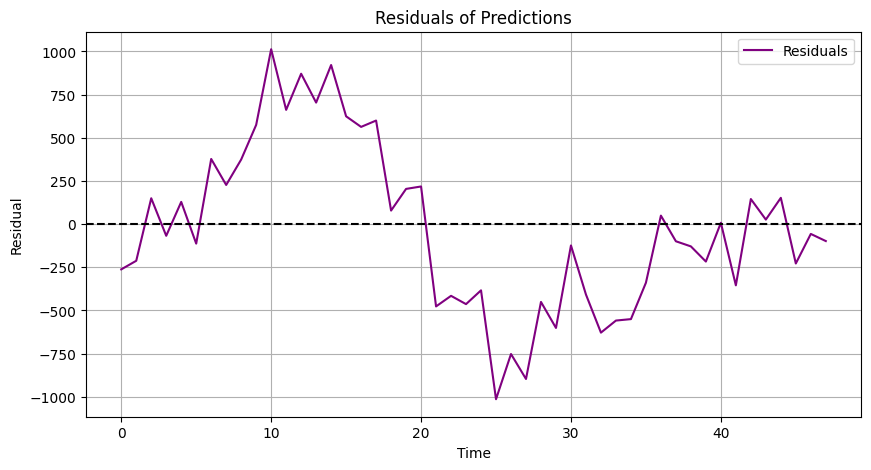

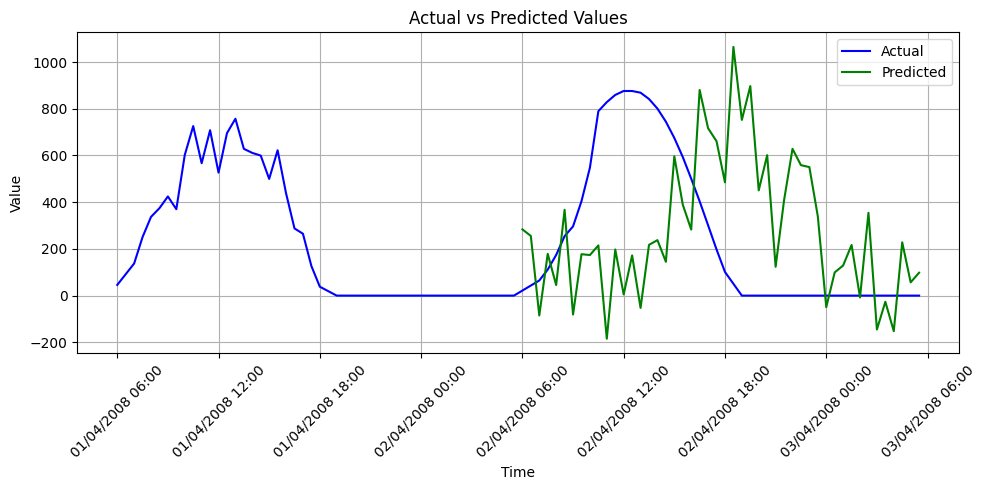

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


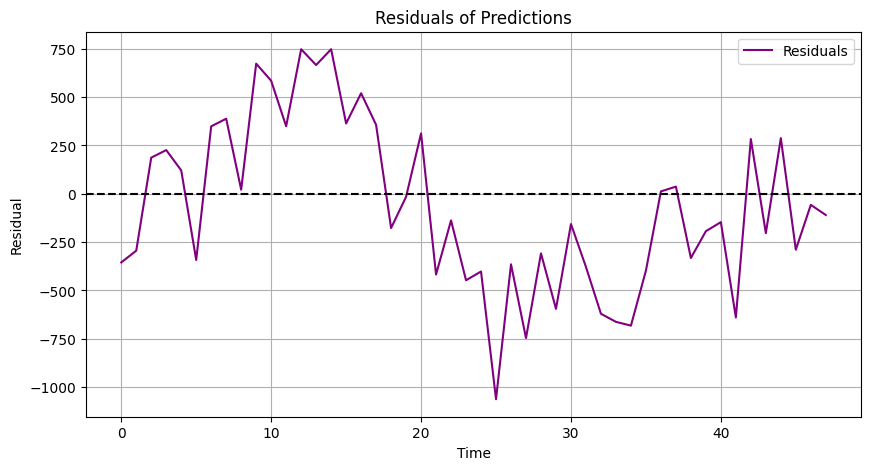

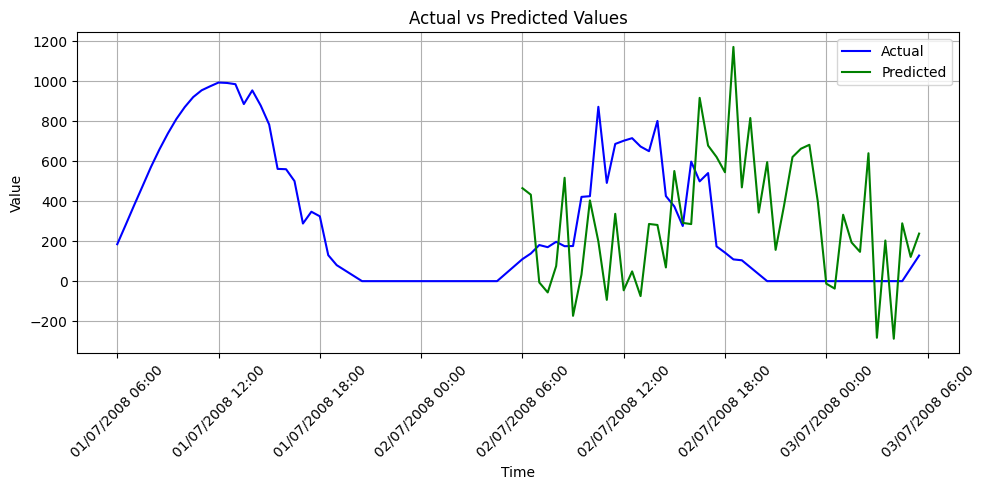

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


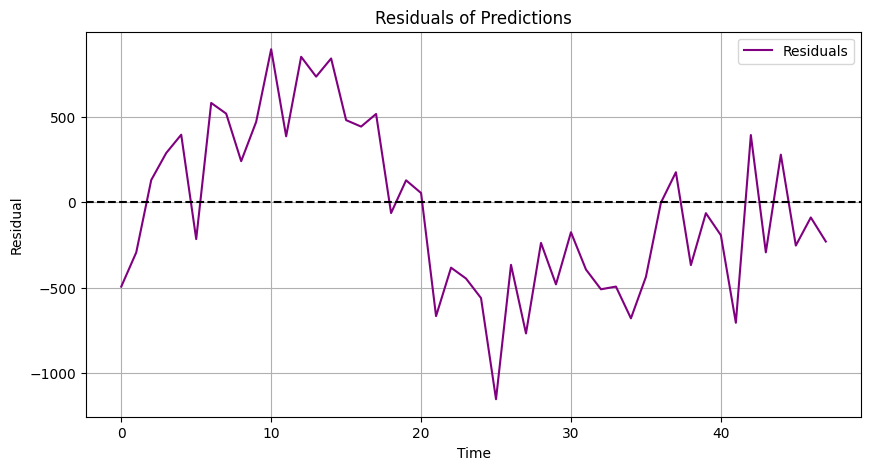

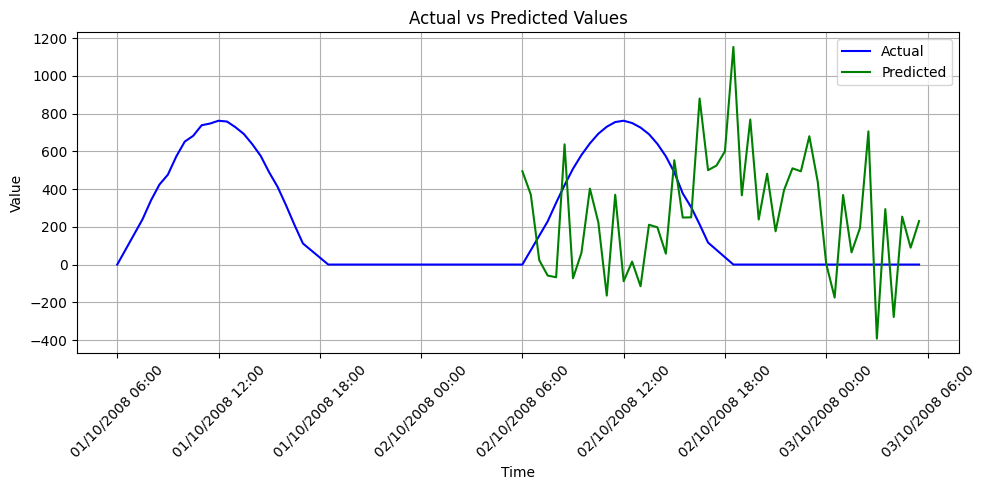

Scaler loaded using joblib from ./models/RNN_2_look72_overlap72_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look72_overlap72_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


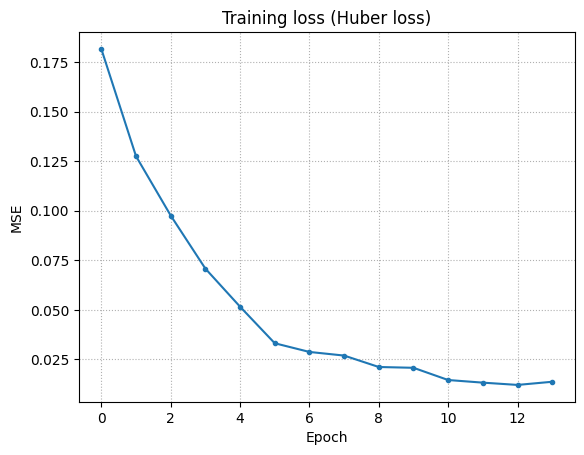

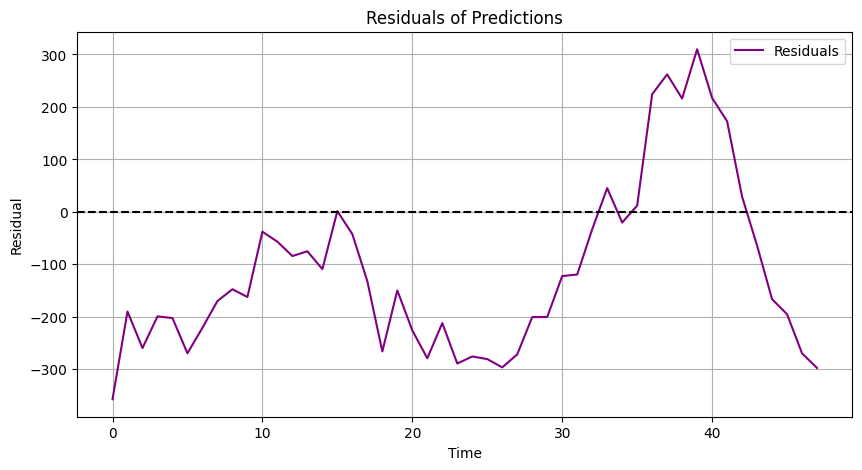

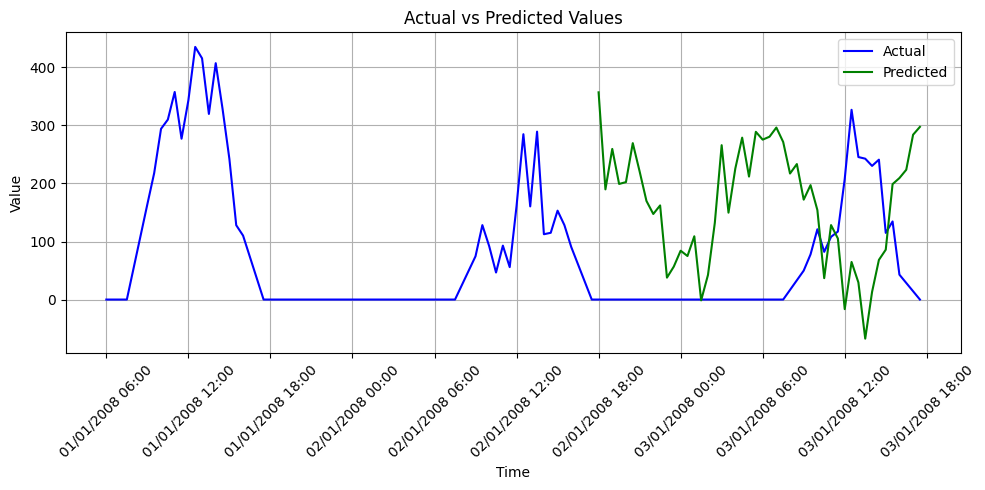

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


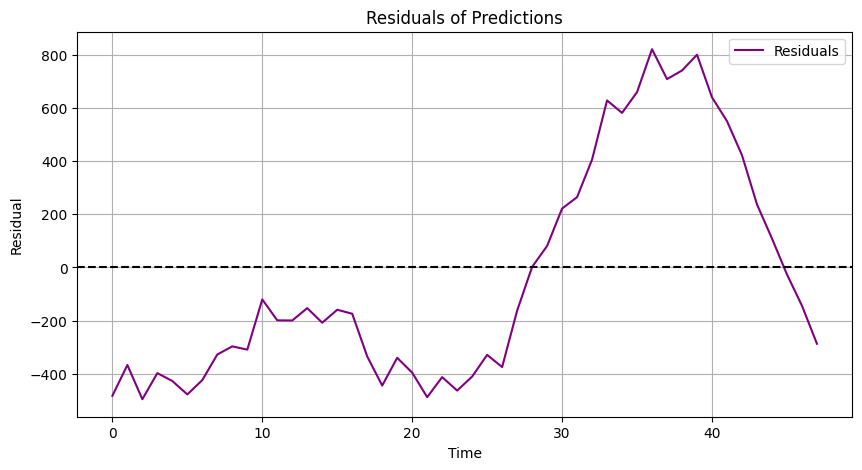

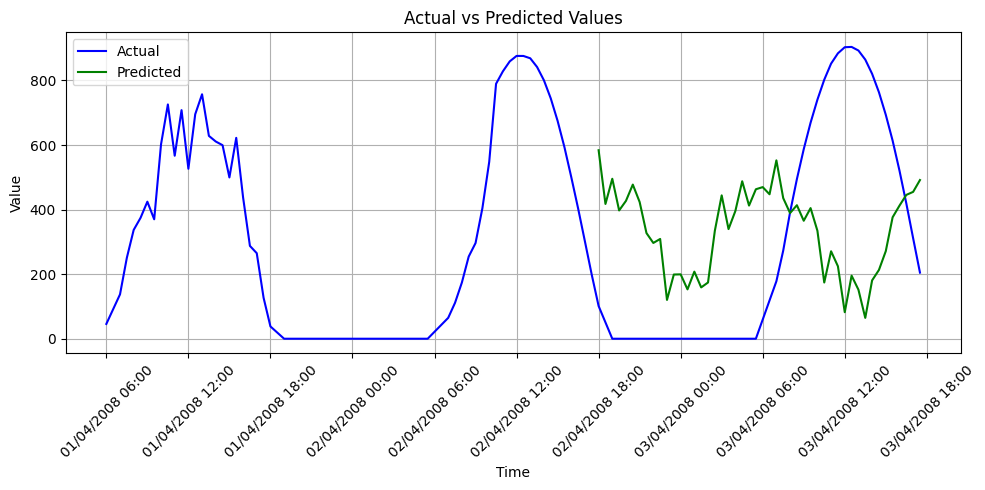

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


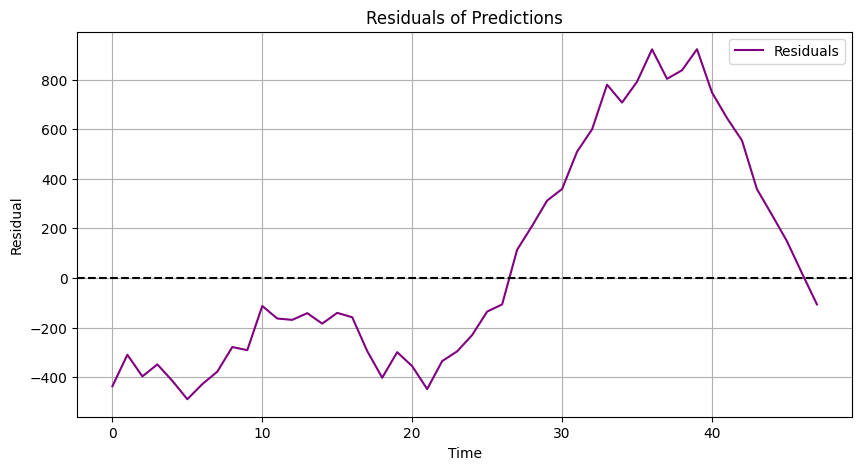

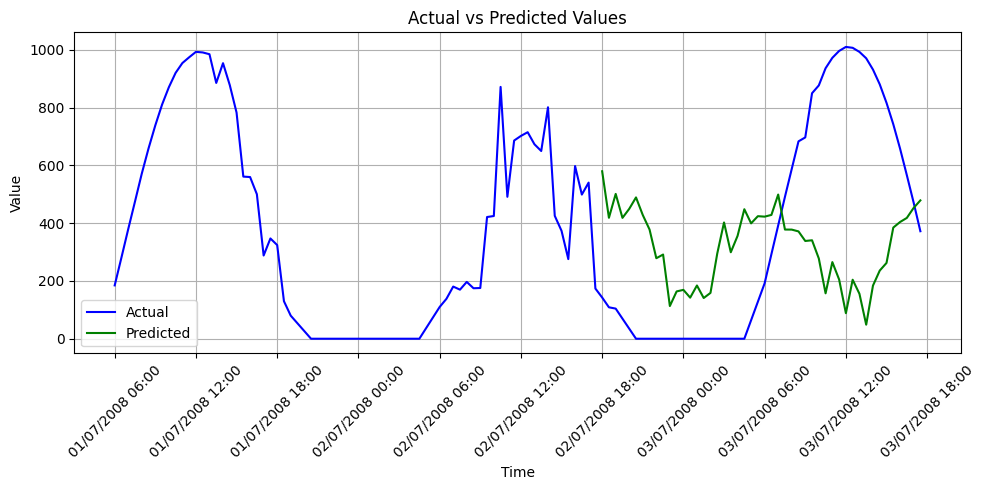

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


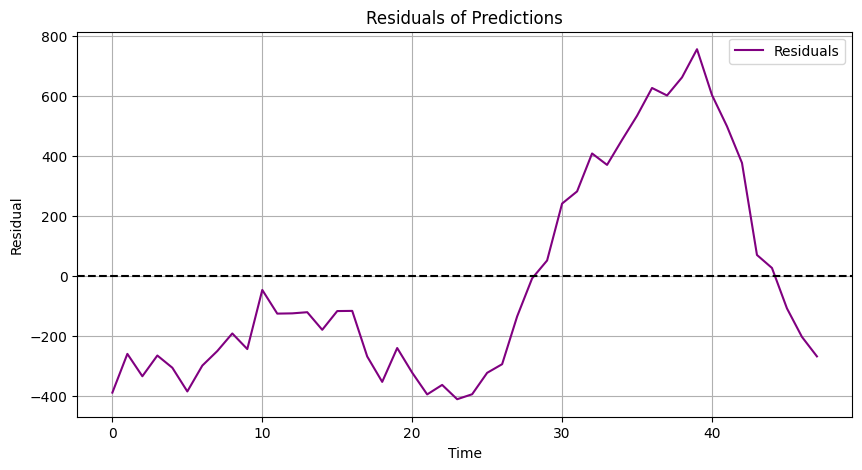

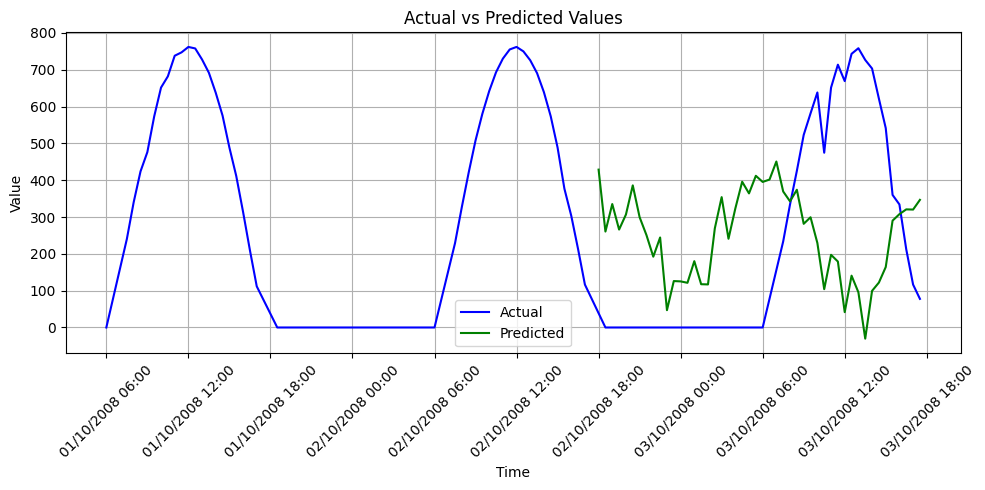

Scaler loaded using joblib from ./models/RNN_2_look96_overlap96_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_2_look96_overlap96_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


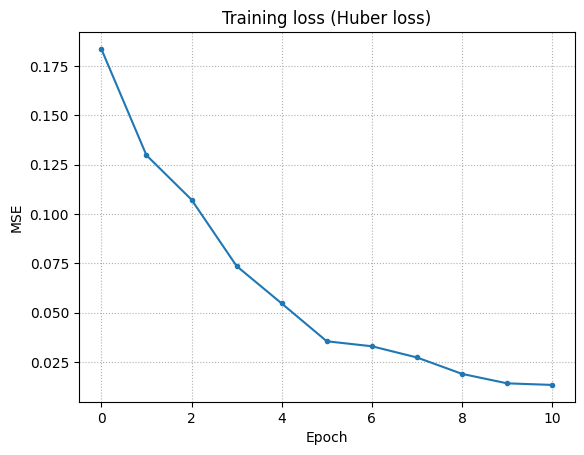

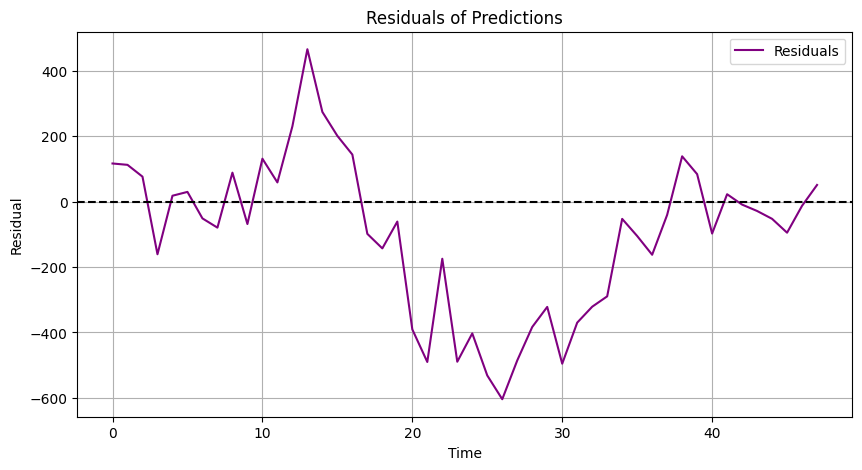

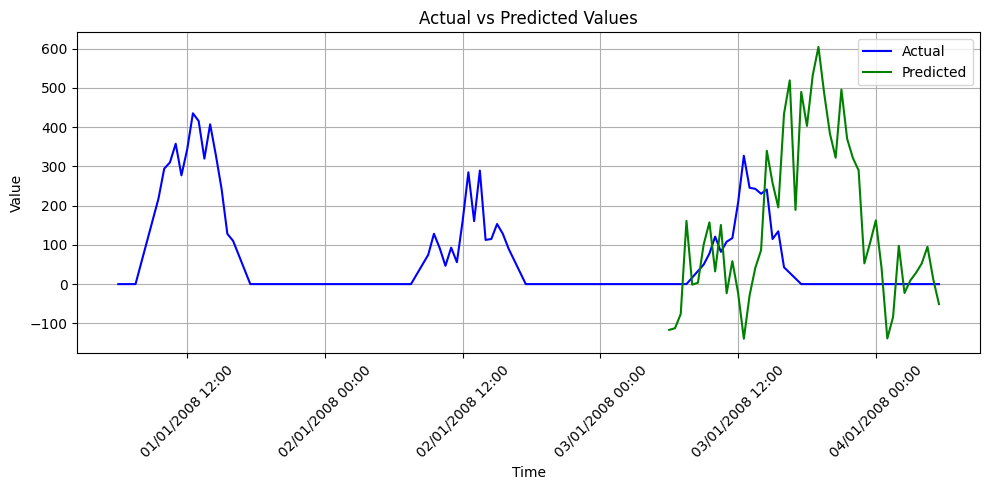

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


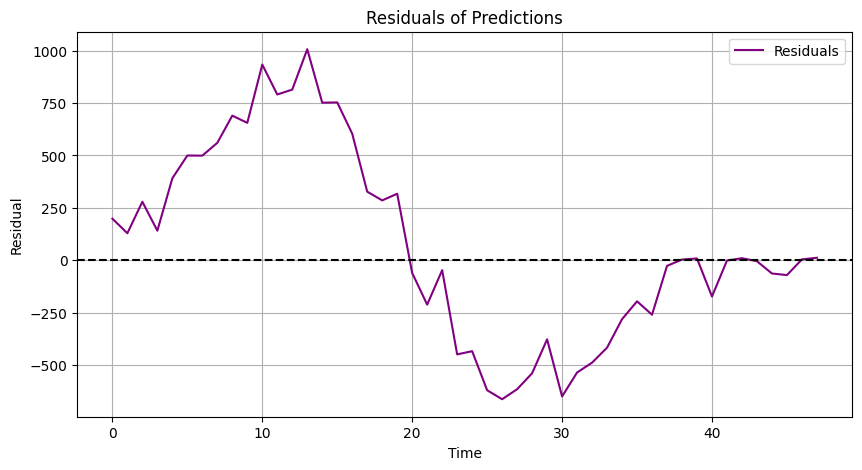

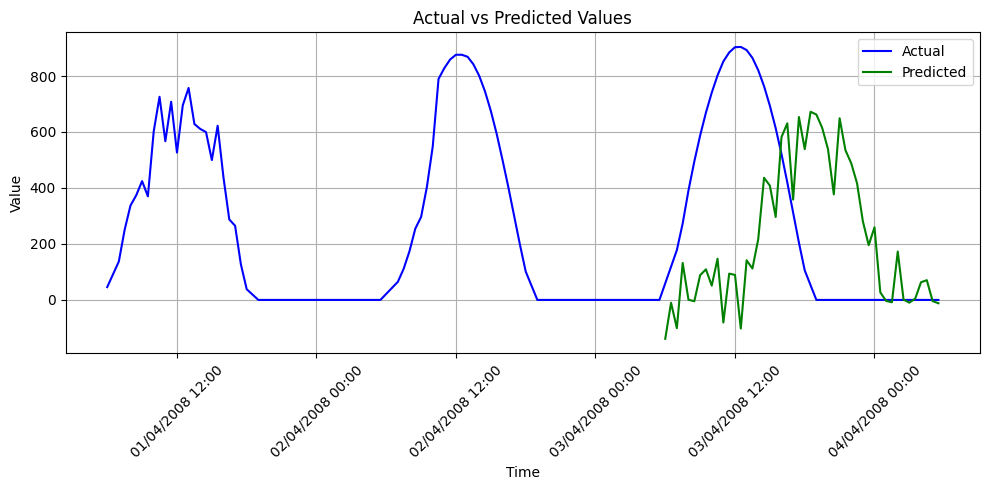

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


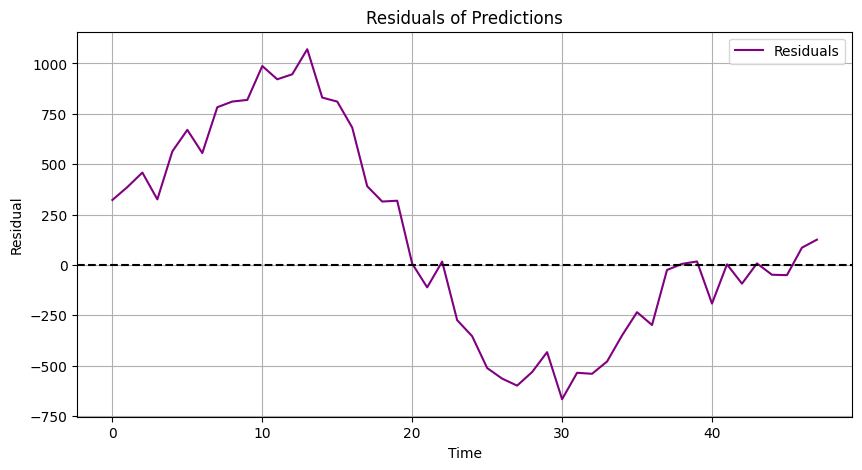

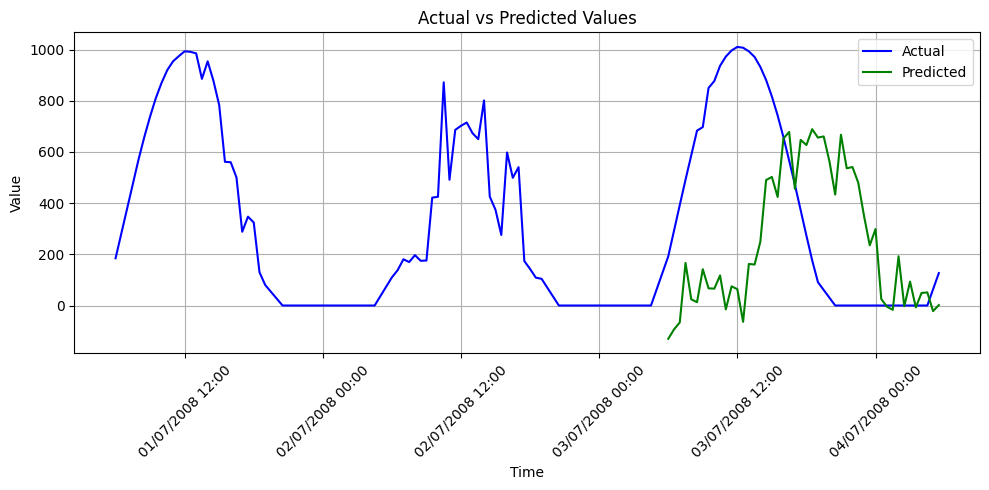

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


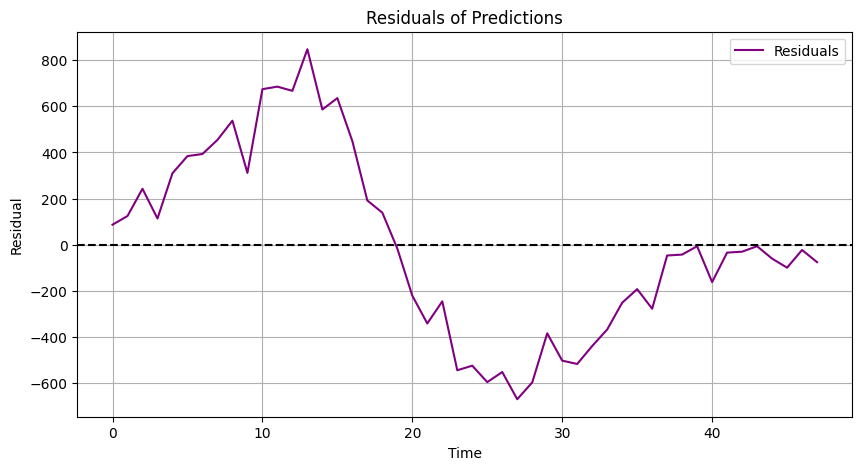

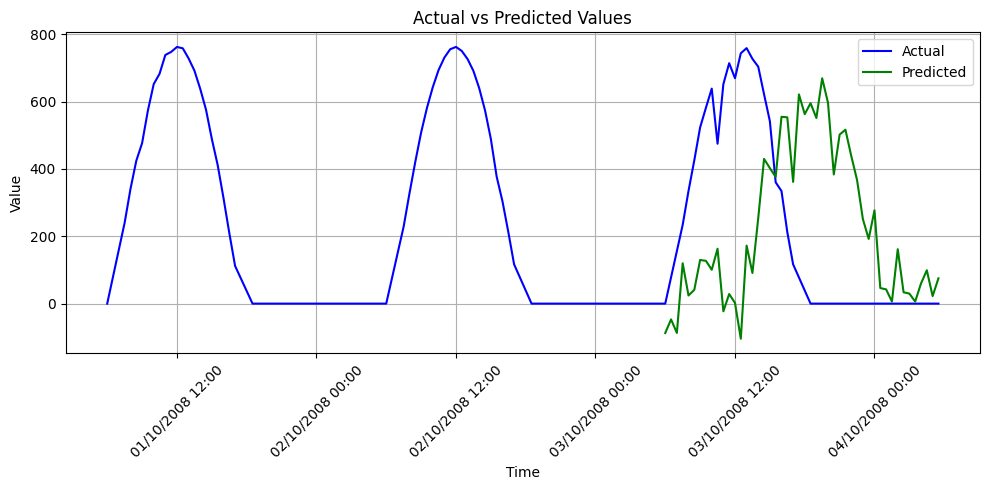

In [7]:
data_for_eval = DataSelectionForEvaluator(dataset)
time_stamps = ['2008-01-01 06:00:00', '2008-04-01 06:00:00', '2008-07-01 06:00:00', '2008-10-01 06:00:00']
for model_conf in model_configurations:
    model = env_dir_options.load_model(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}.keras'))
    history = json.load(open(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_history.json')))
    scaler_x = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_x.pkl'))
    scaler_y = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_y.pkl'))

    # Evaluation of the model in different timestamps

    for iter, time_stamp in enumerate(time_stamps):
        y_true, y_pred, extended_y_true = data_for_eval.data_selection(model_=model,
                                                                       time_stamp=time_stamp,
                                                                       num_look_back_steps=model_conf["model"]["training"][
                                                                           "n_past_steps"],
                                                                       num_forecast_steps=model_conf["model"]["training"][
                                                                           "n_forecast_steps"],
                                                                       columns_for_training=
                                                                       model_conf["model"]["training"][
                                                                           "columns_for_training"],
                                                                       scaler_x=scaler_x,
                                                                       scaler_y=scaler_y,
                                                                       date_index="timestamp",
                                                                       target_column="GHI")
    
        evaluator = ModelEvaluator(y_true, y_pred)
        if iter == 0:
            evaluator.plot_loss(history, 'Huber loss')
        evaluator.plot_residuals()
        evaluator.plot_actual_vs_predicted(extended_y_true, model_conf["model"]["training"]["n_past_steps"])